# Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

In [2]:
w.filterwarnings('ignore')

In [3]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Set2')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

# Importando a Base de Dados

In [4]:
data = pd.read_csv('tips.csv')

In [5]:
data

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [7]:
data.shape

(244, 6)

# Traduzindo os nossos dados

In [8]:
data.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [9]:
rename = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [10]:
gorjetas = data.rename(columns=rename)

In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
y_n = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [14]:
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(y_n)

In [15]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [16]:
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
days = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [18]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(days)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [20]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [21]:
gorjetas['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [22]:
hours = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [23]:
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(hours)

In [24]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise 1 - Valor da conta e gorjeta

In [25]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

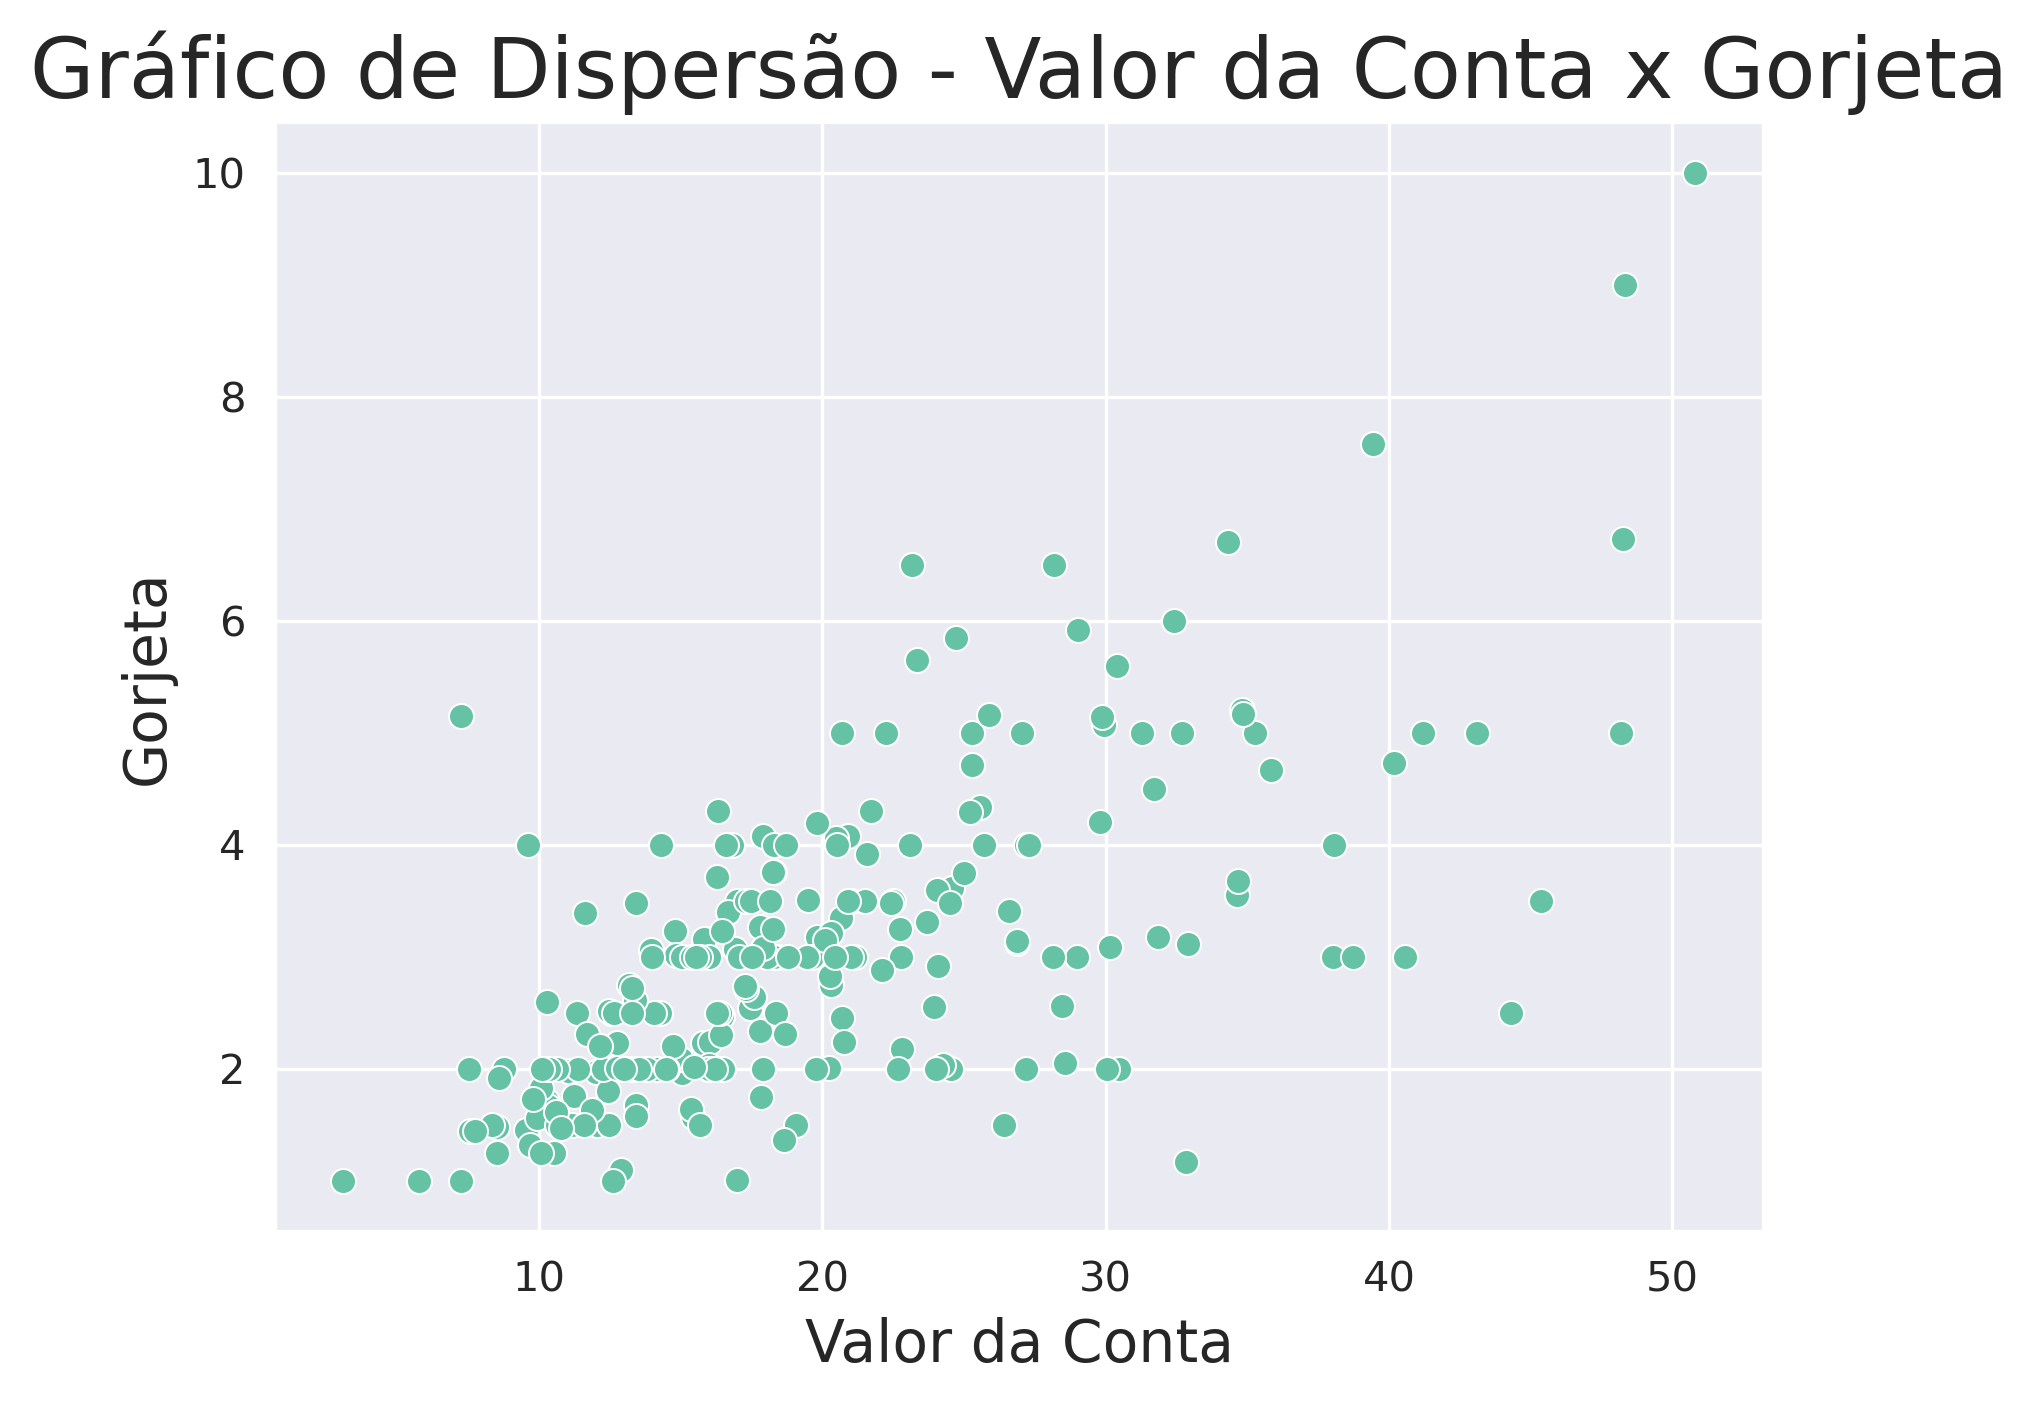

In [26]:
ax = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
ax.set_title('Gráfico de Dispersão - Valor da Conta x Gorjeta', fontsize=20)
ax.set_xlabel('Valor da Conta', fontsize=14)
ax.set_ylabel('Gorjeta', fontsize=14)
ax.figure.dpi = 300
plt.show()

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta aumenta.**

In [27]:
print(f'A base de dados contém {gorjetas.shape[0]} registros \n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [28]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [29]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [30]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


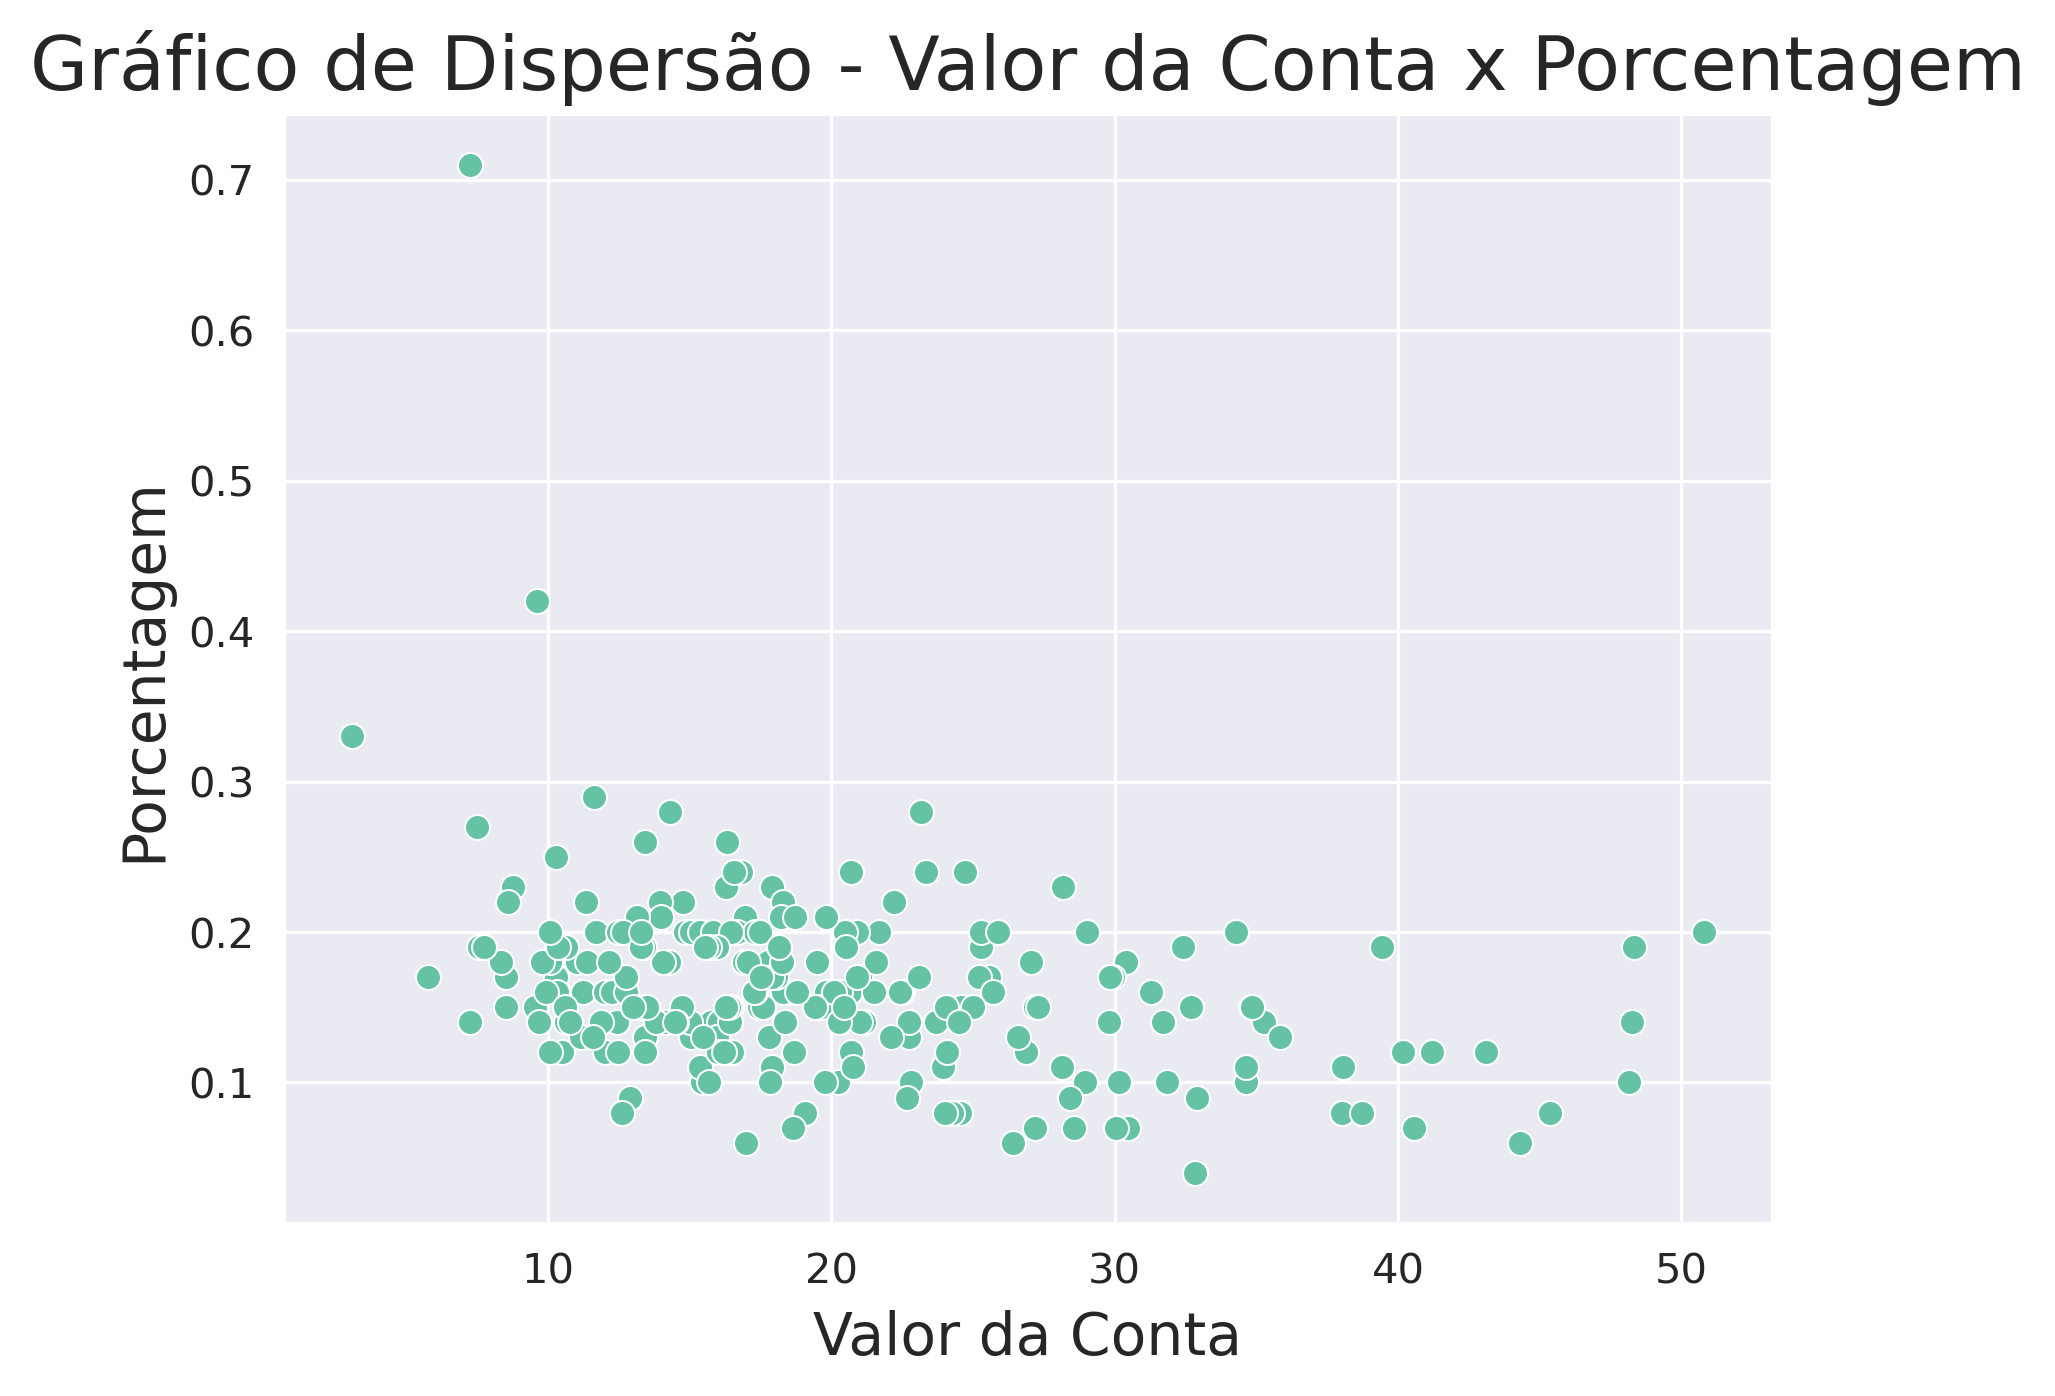

In [31]:
ax = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
ax.set_title('Gráfico de Dispersão - Valor da Conta x Porcentagem', fontsize=18)
ax.set_xlabel('Valor da Conta', fontsize=14)
ax.set_ylabel('Porcentagem', fontsize=14)
ax.figure.dpi = 300
plt.show()

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

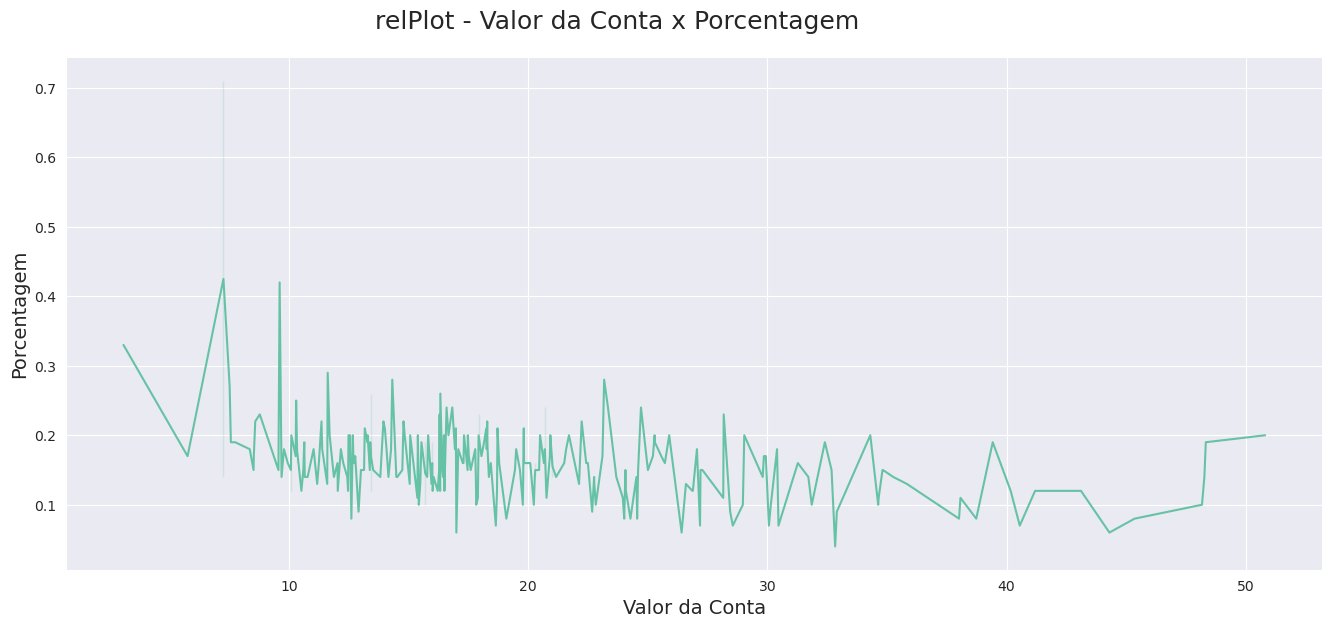

In [32]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas, kind='line')
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

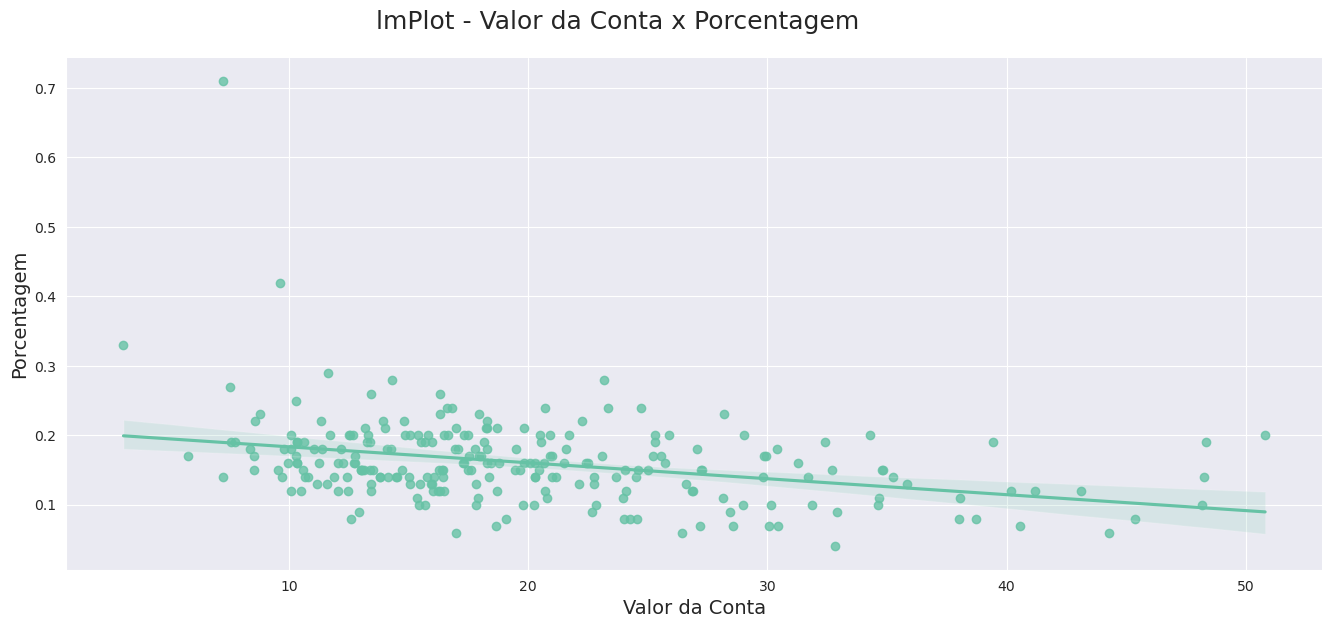

In [33]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('lmPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

# Análise 2 - Sobremesa

In [34]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [35]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [36]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


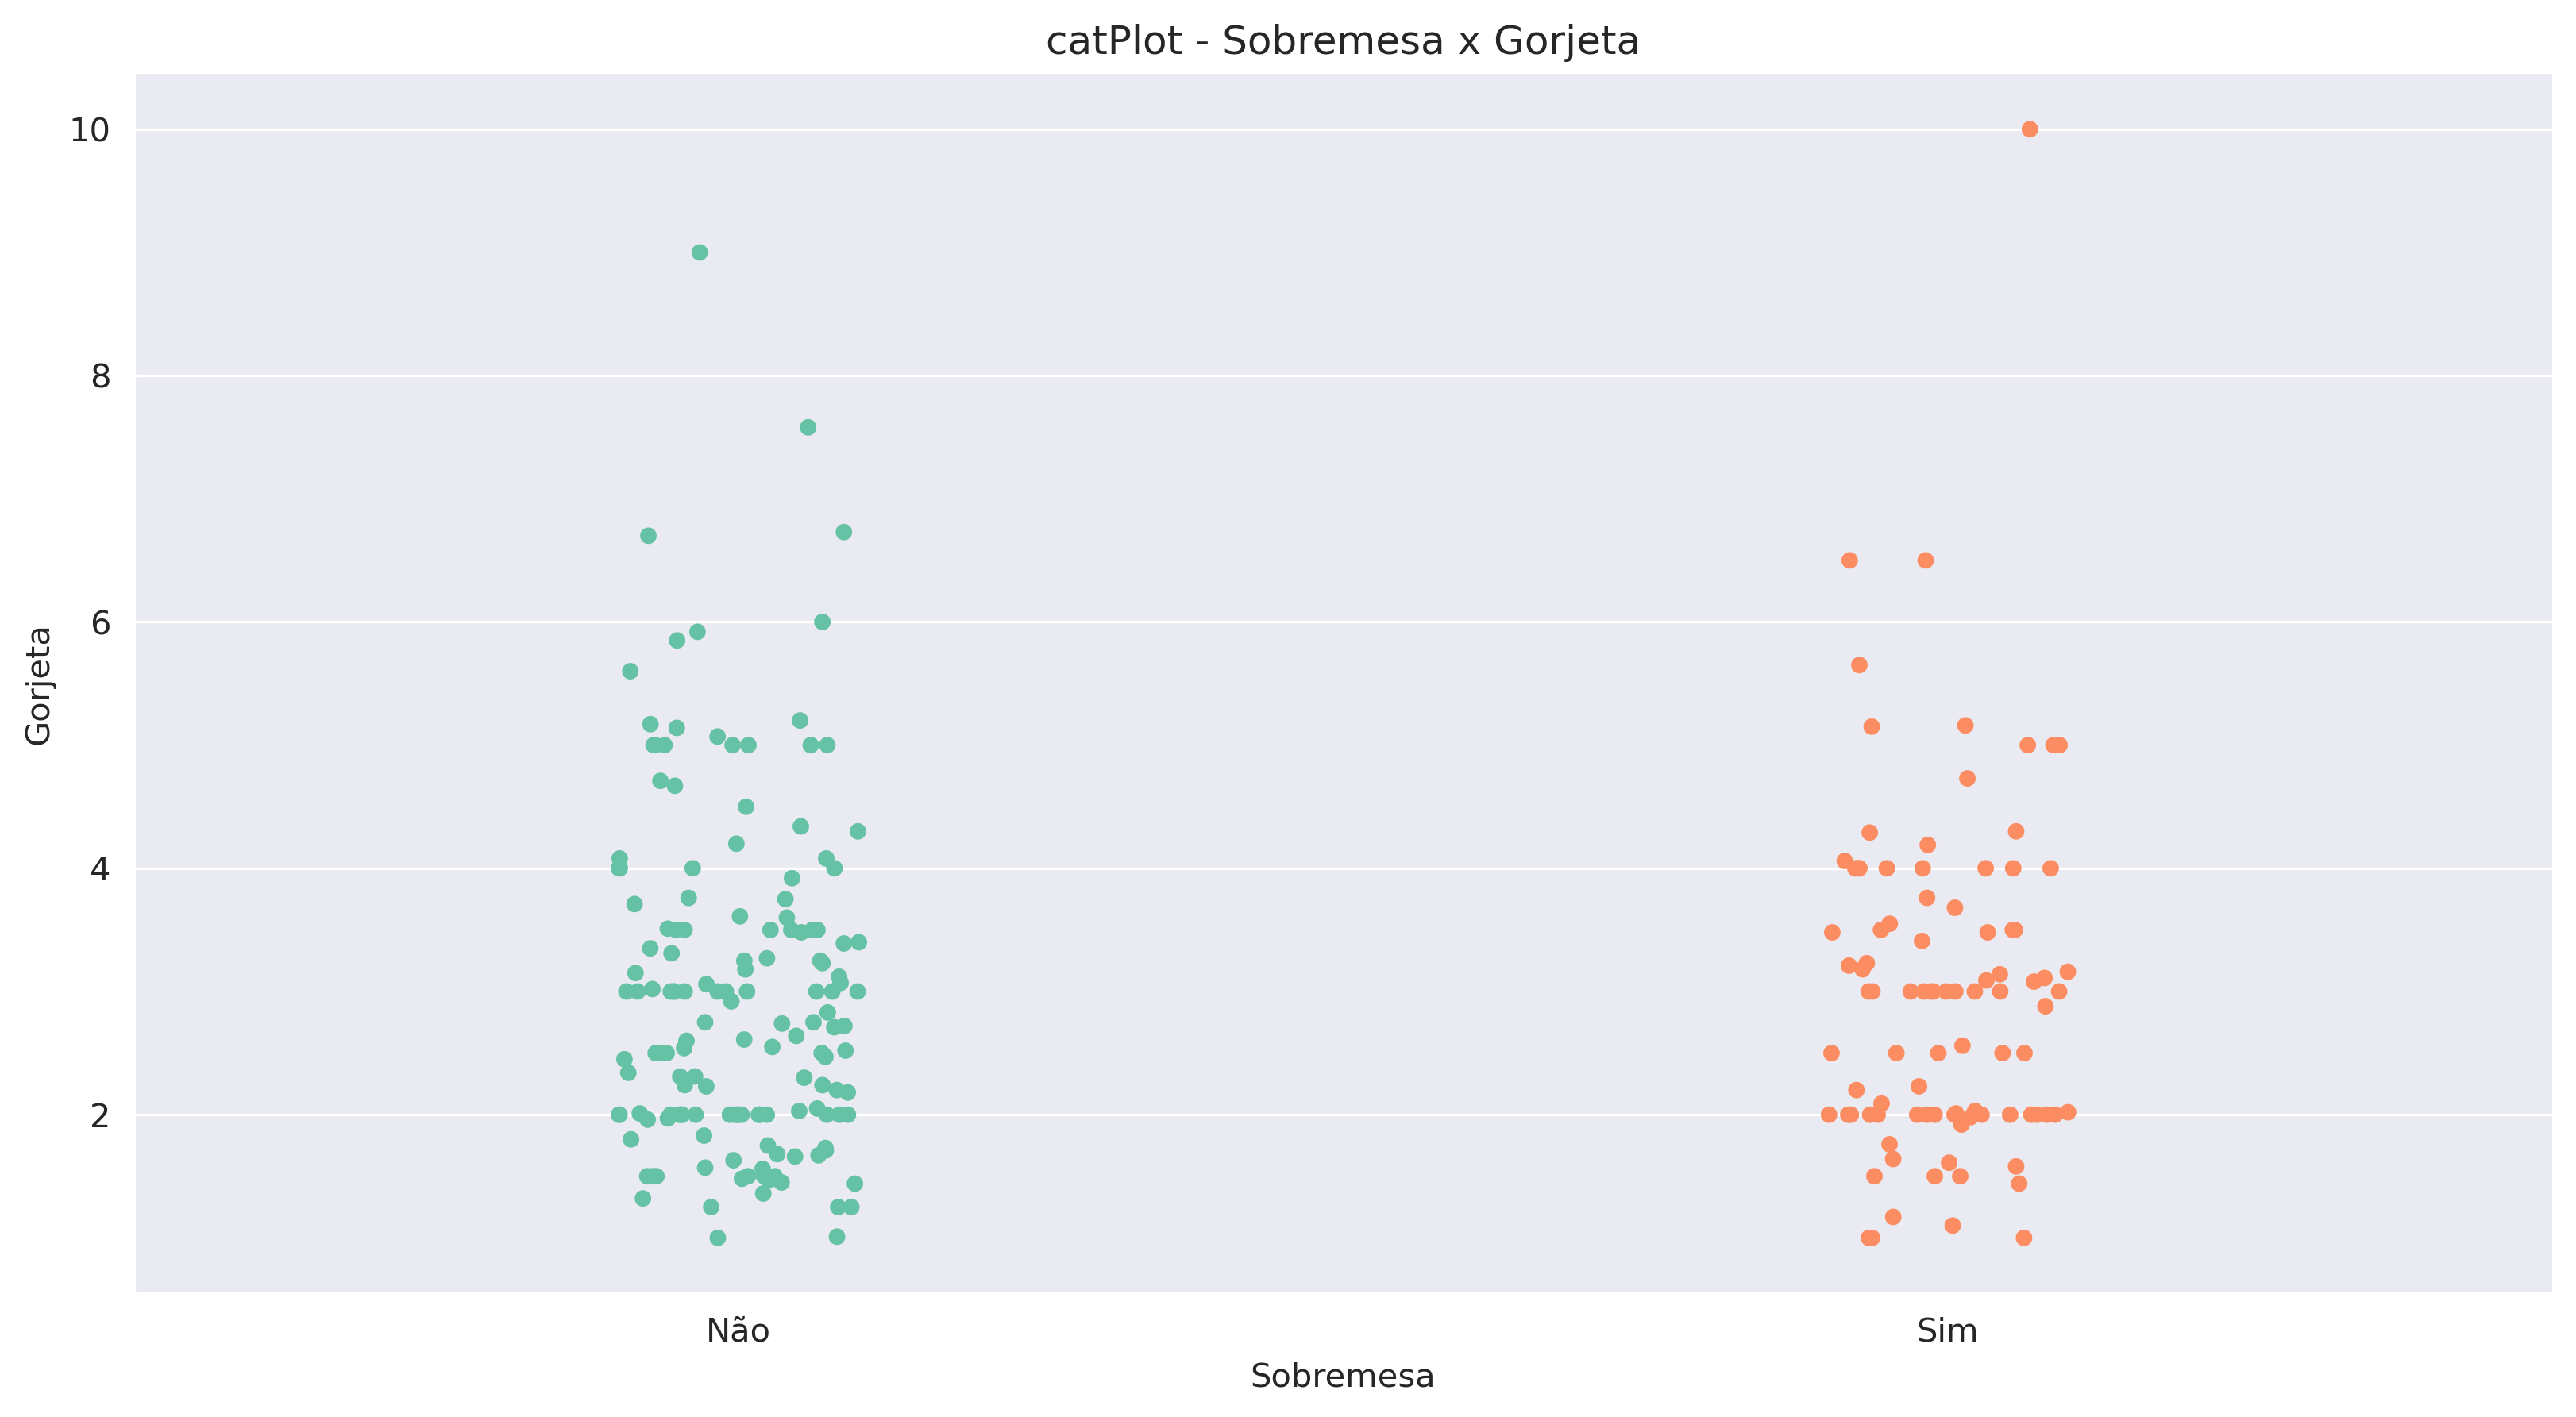

In [37]:
ax = sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)
ax.fig.set_size_inches(12, 6)
ax.set(xlabel='Sobremesa', ylabel='Gorjeta', title='catPlot - Sobremesa x Gorjeta')
ax.figure.dpi = 300
plt.show()

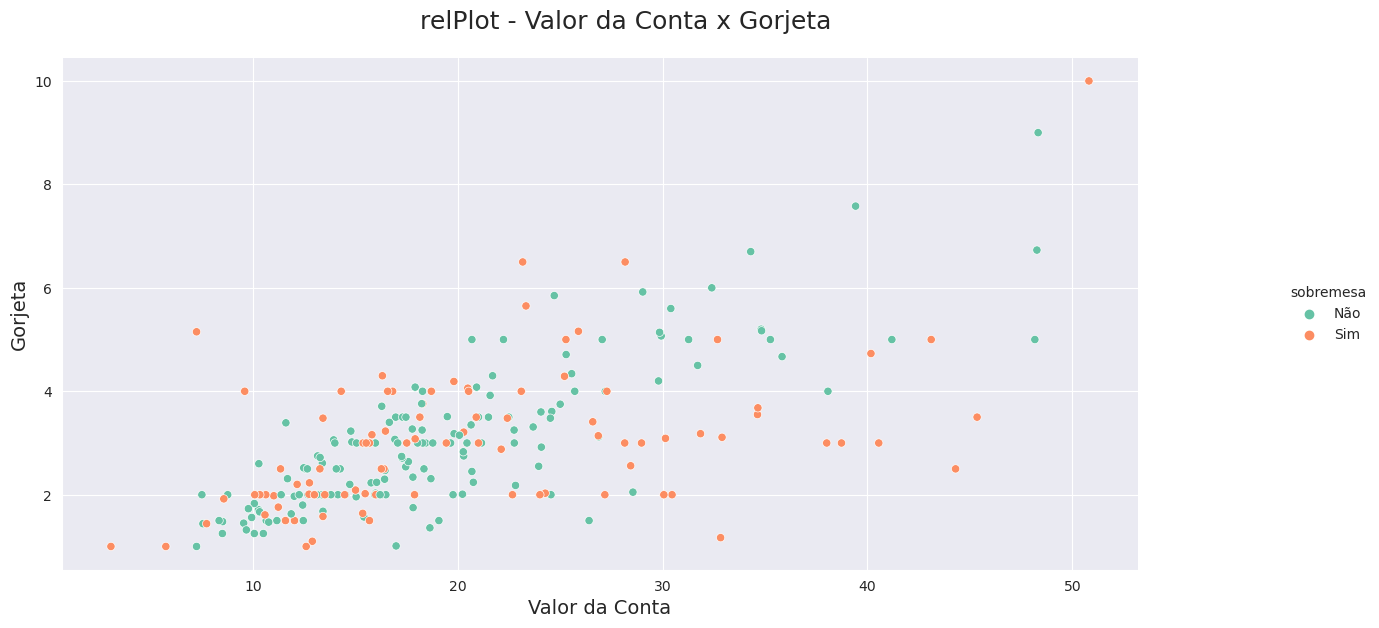

In [38]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, )
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

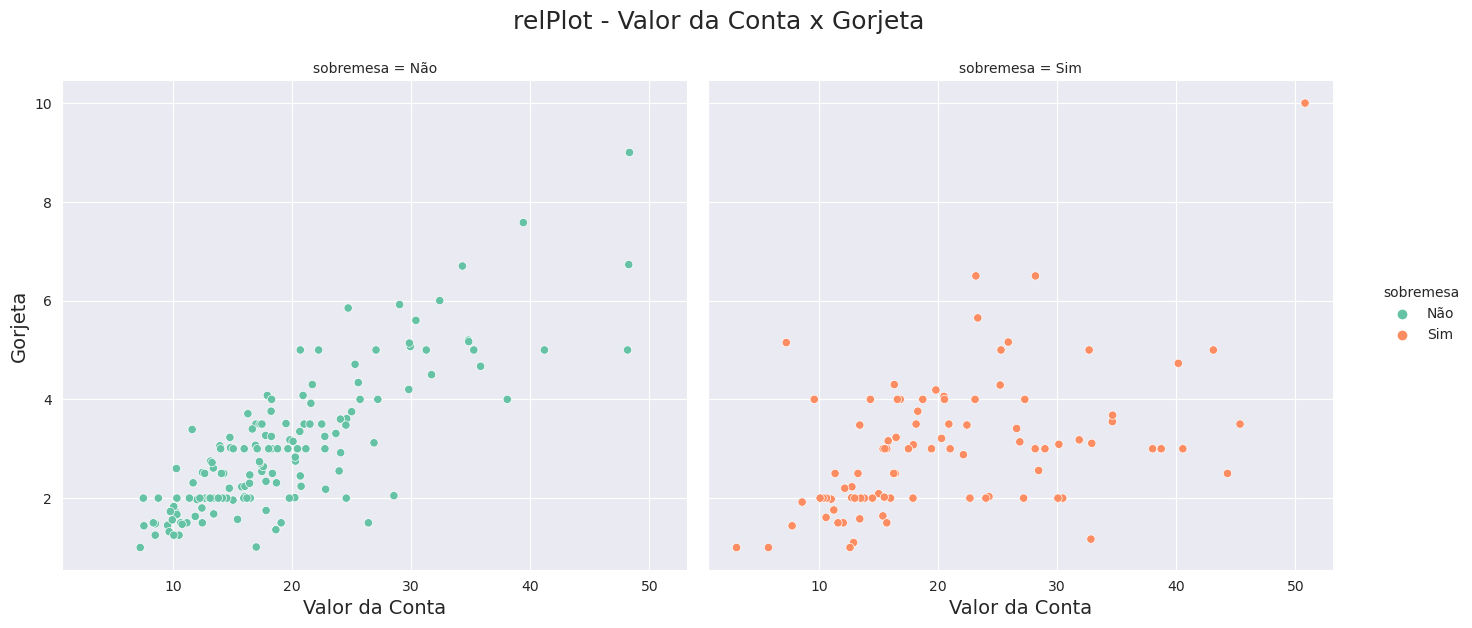

In [39]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas, )
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

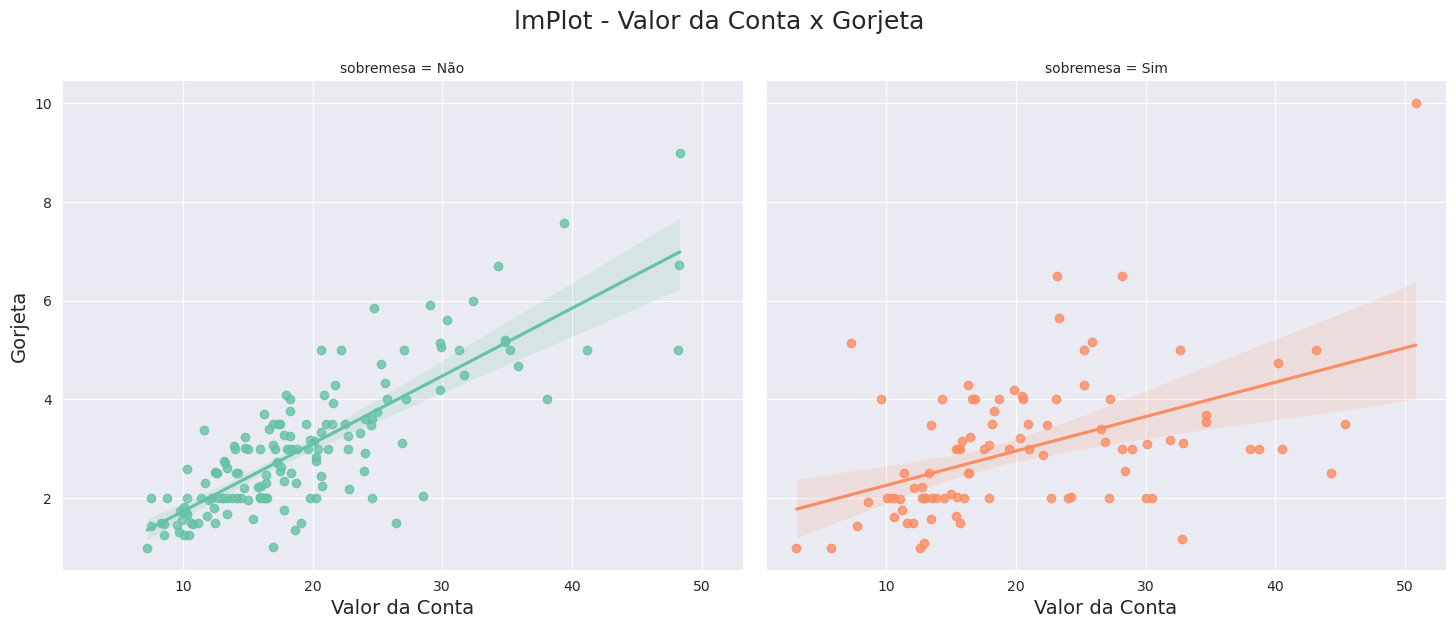

In [40]:
ax = sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('lmPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

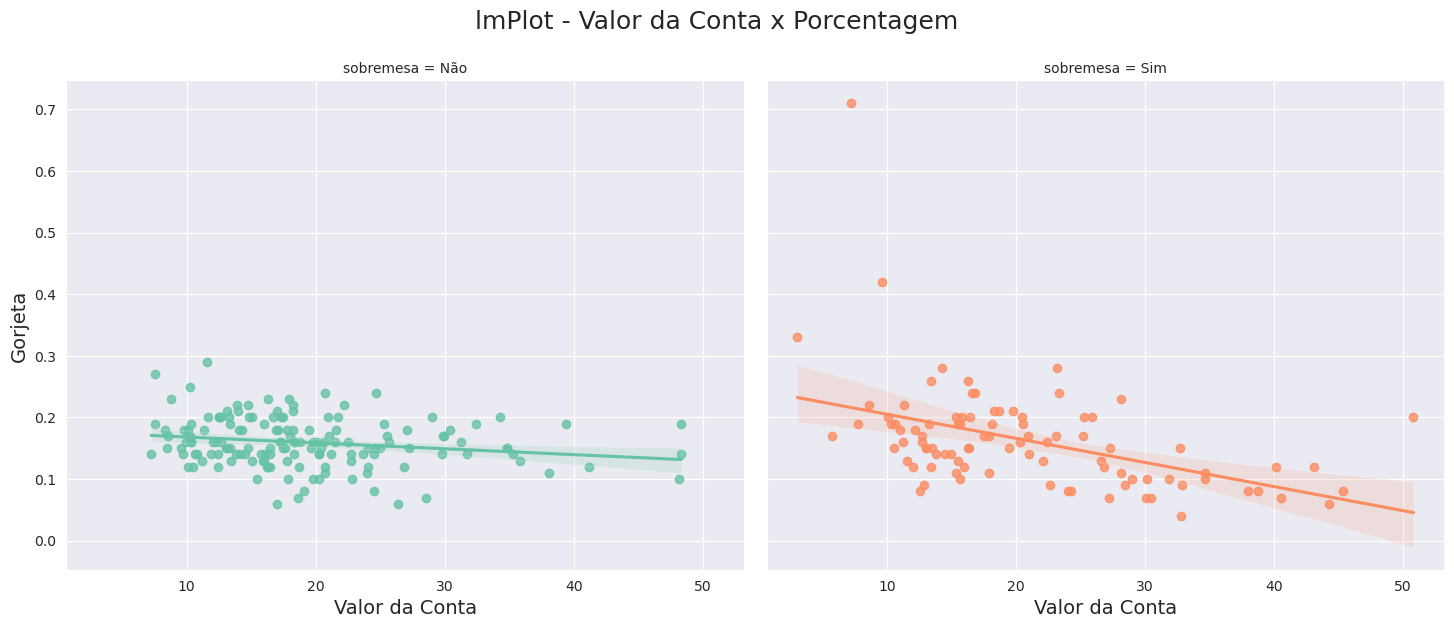

In [41]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('lmPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

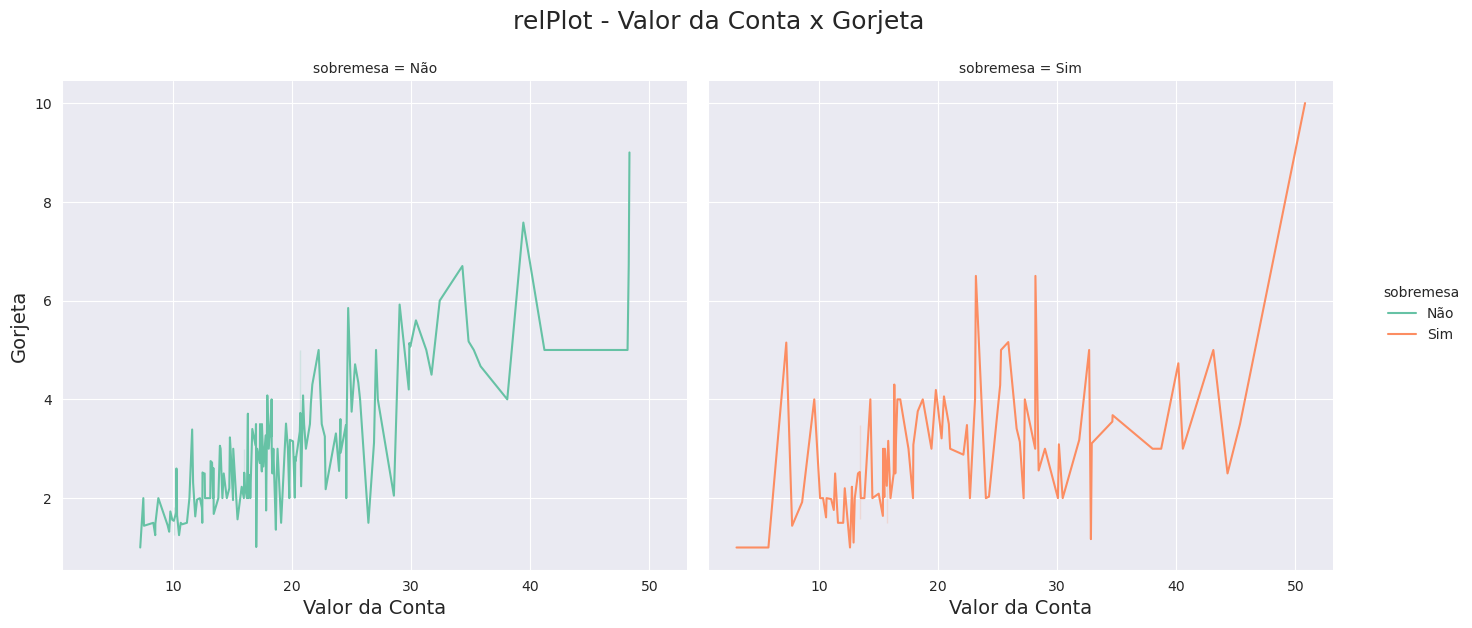

In [42]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas, kind='line')
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

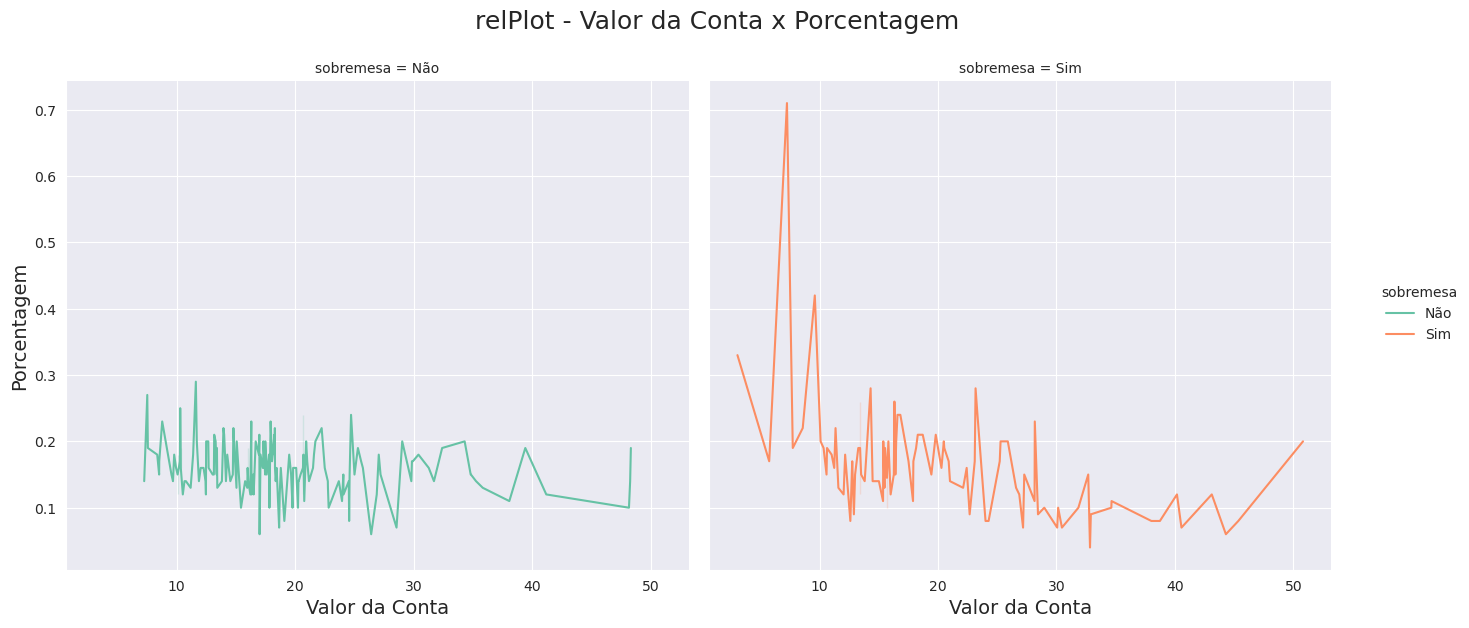

In [43]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas, kind='line')
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram**

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [44]:
from scipy.stats import ranksums

In [45]:
dessert = gorjetas.query("sobremesa == 'Sim'")['porcentagem']

In [46]:
w_dessert = gorjetas.query("sobremesa == 'Não'")['porcentagem']

In [47]:
_, p_value = ranksums(dessert, w_dessert)

In [48]:
print(f'O valor do p-value é {p_value}')
print('Aceitaremos h_null!...') if p_value > 0.05 else print('Rejeitaremos h_null e aceitaremos h_alt!...')

O valor do p-value é 0.5266635660124415
Aceitaremos h_null!...


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [49]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

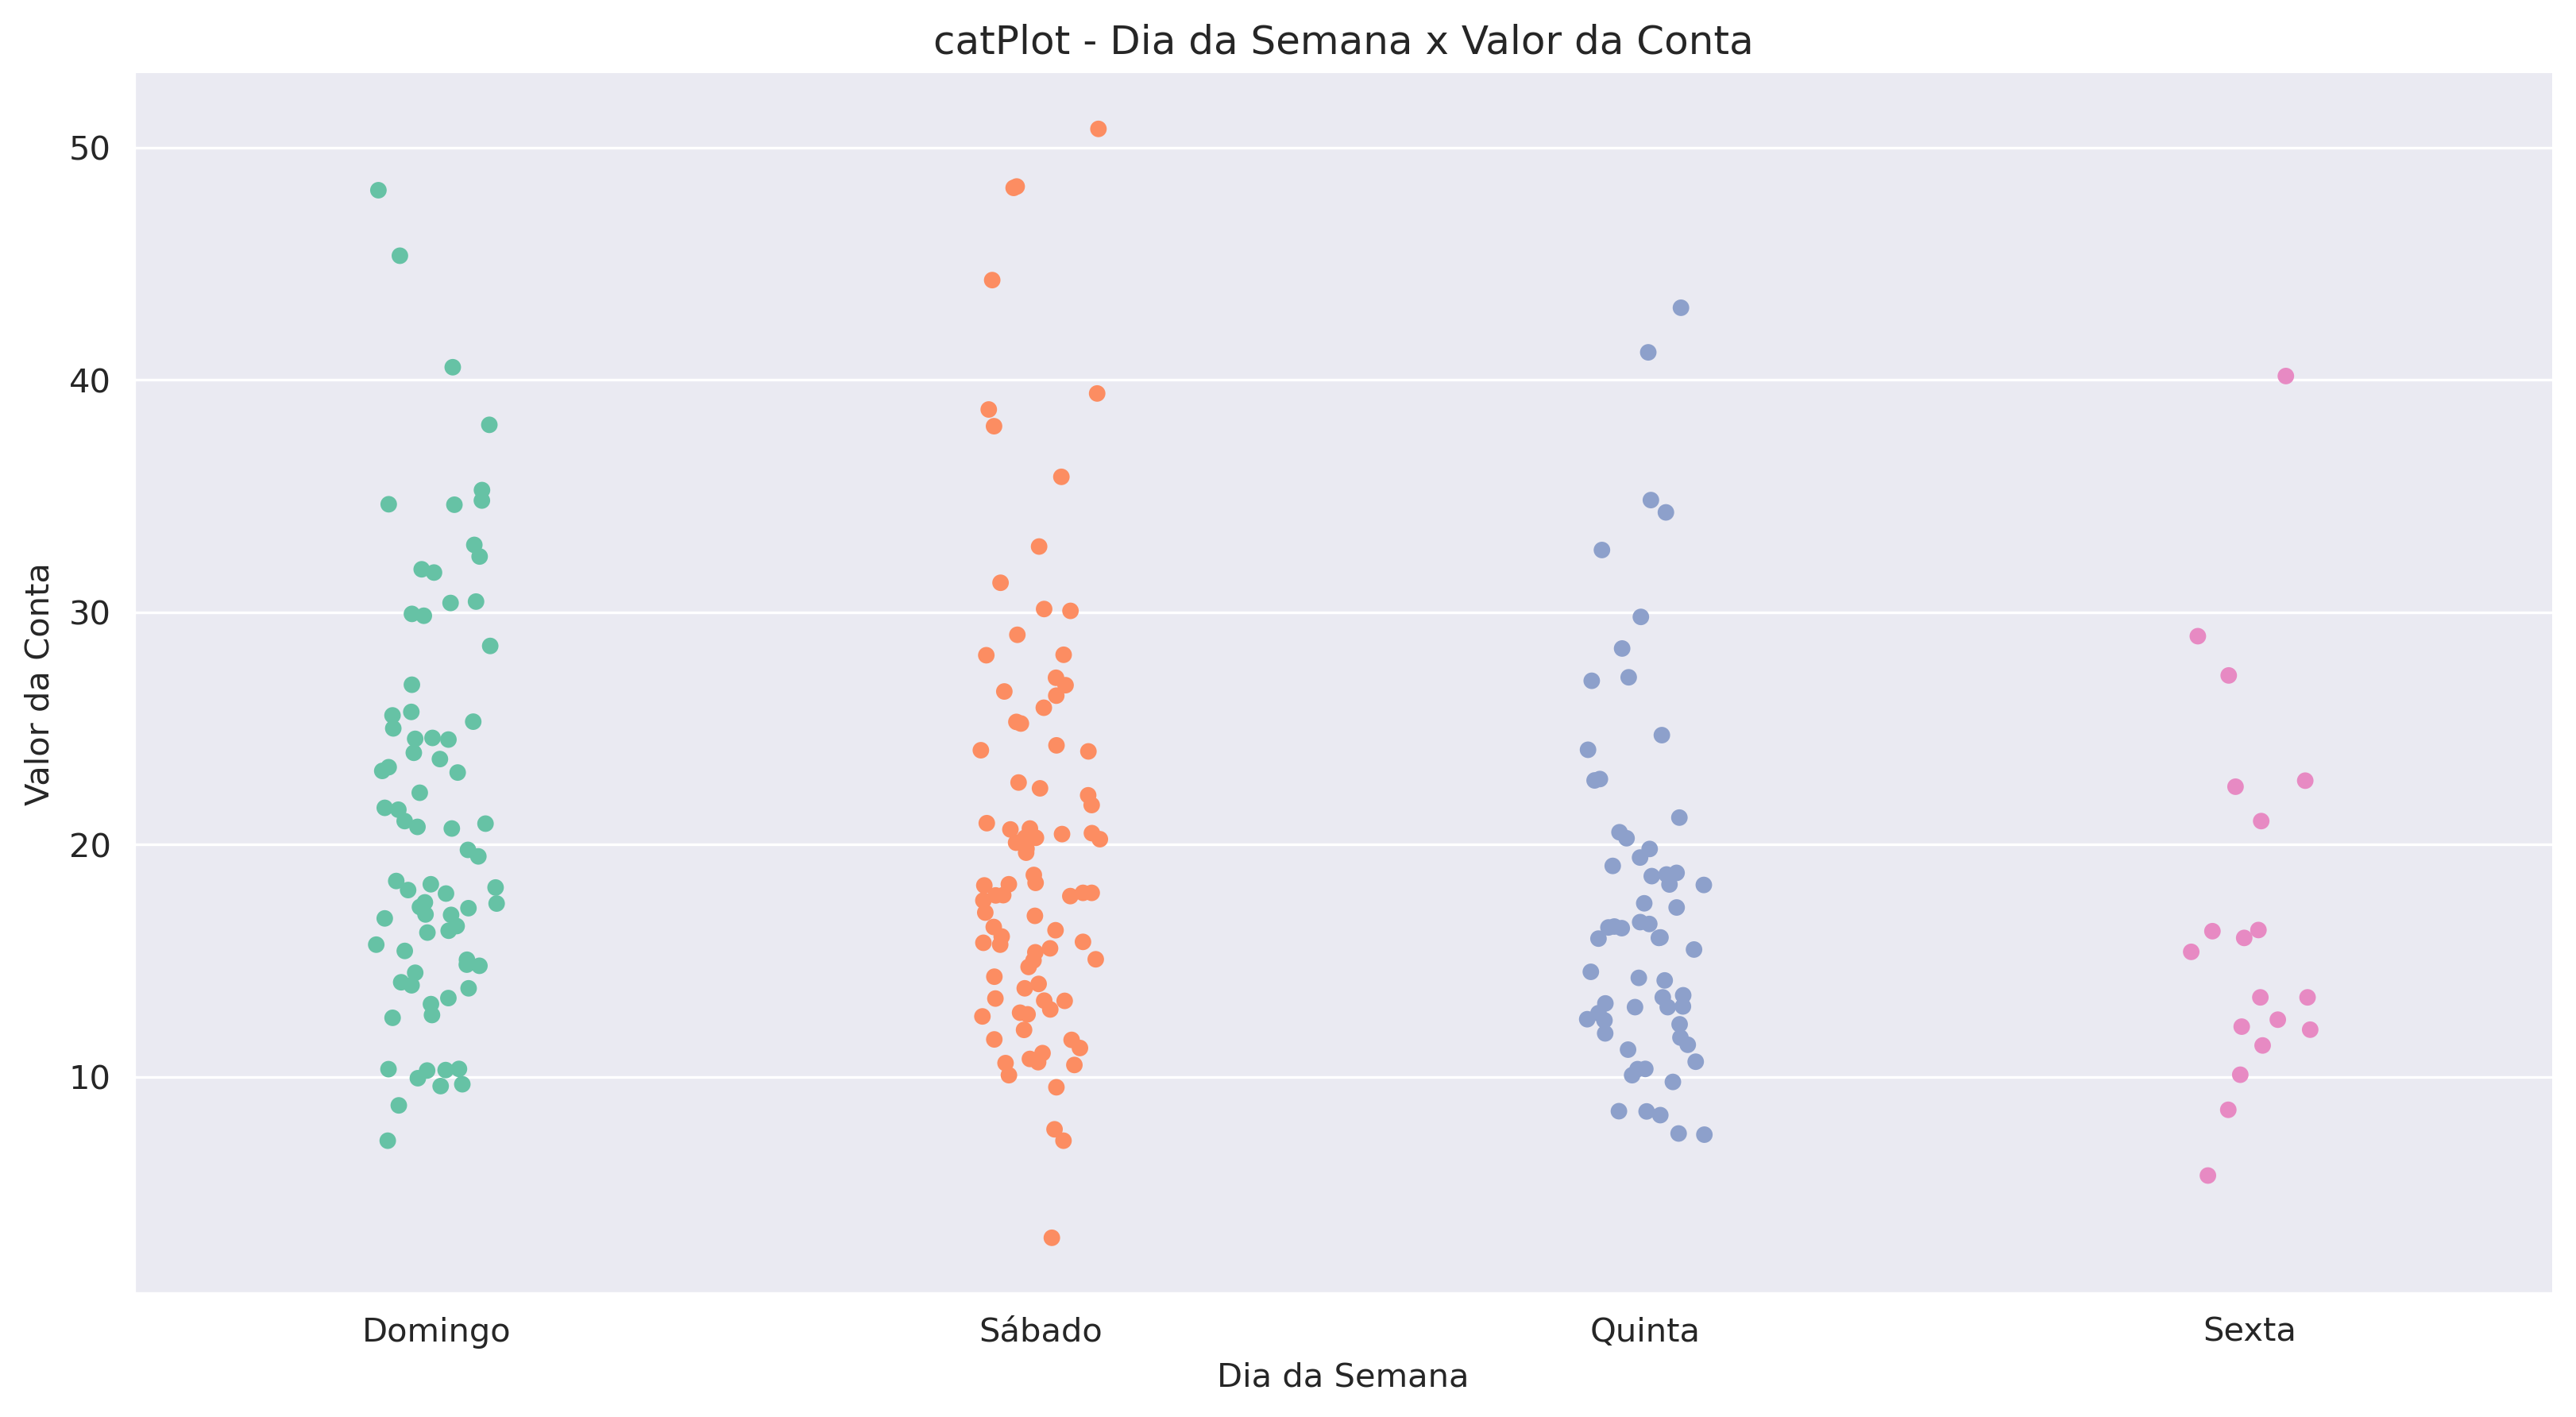

In [50]:
ax = sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)
ax.fig.set_size_inches(12, 6)
ax.set(xlabel='Dia da Semana', ylabel='Valor da Conta', title='catPlot - Dia da Semana x Valor da Conta')
ax.figure.dpi = 300
plt.show()

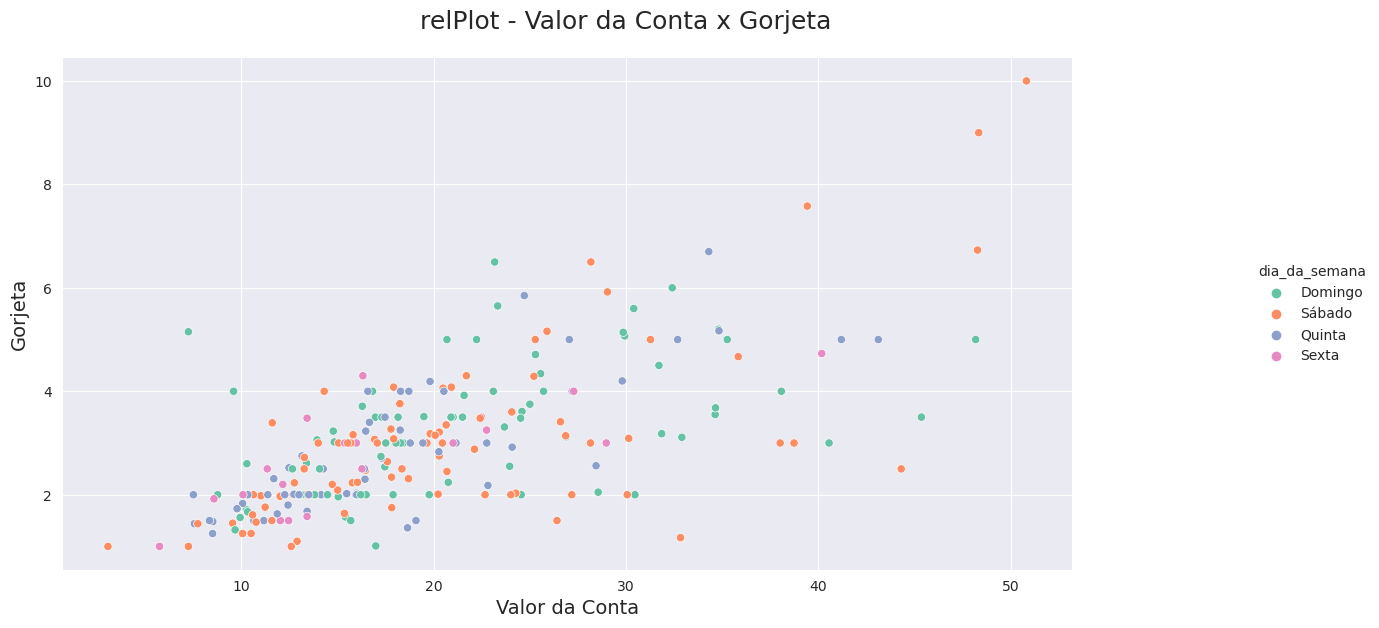

In [51]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

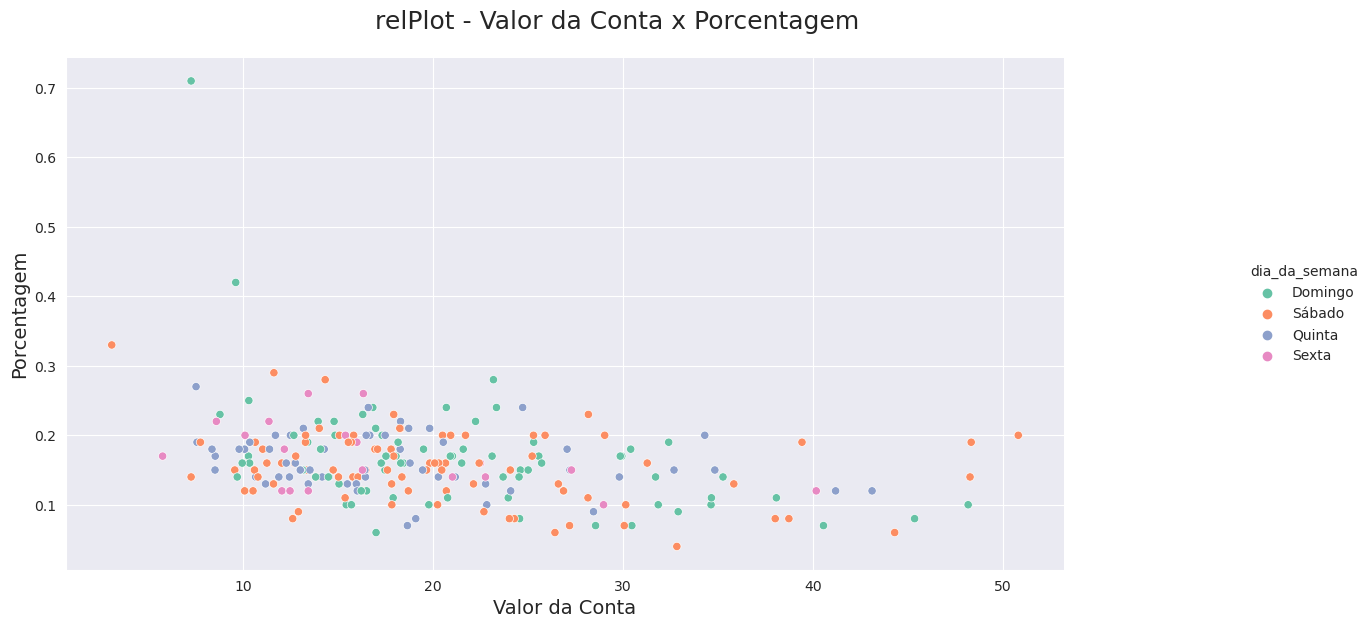

In [52]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

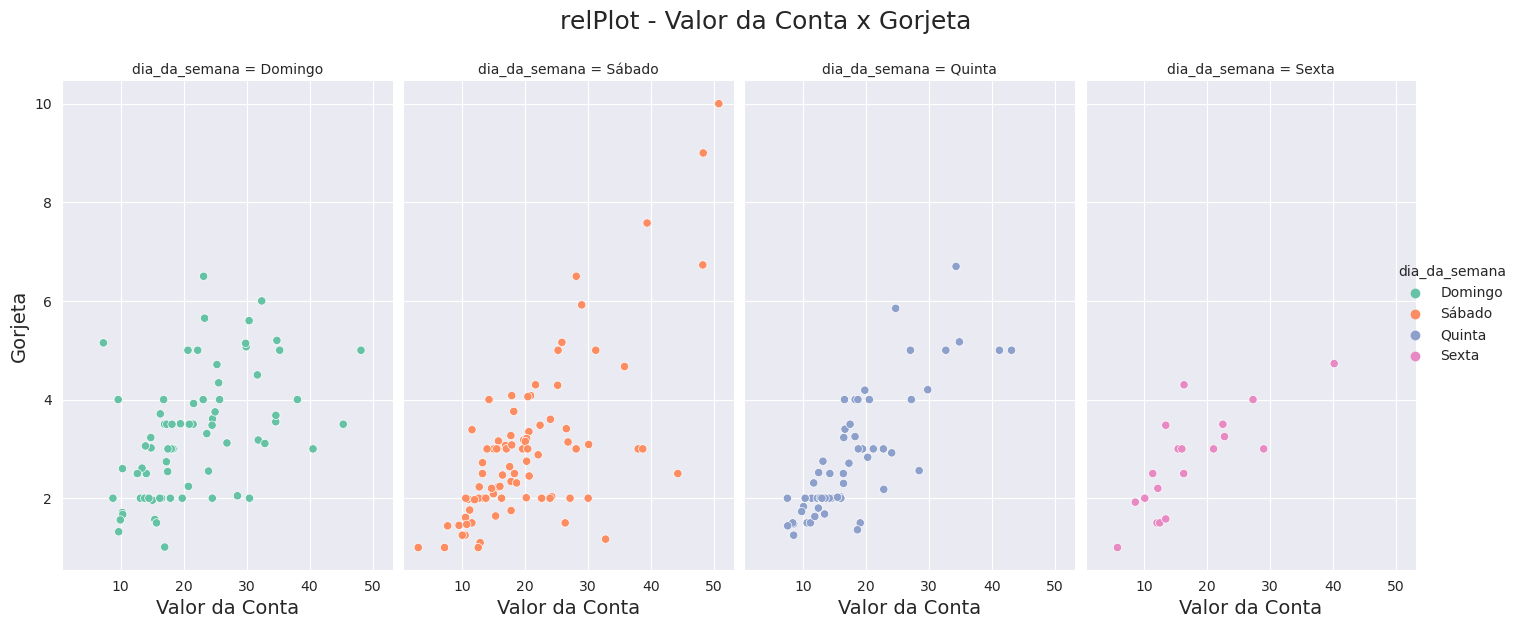

In [53]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Gorjeta', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Gorjeta', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

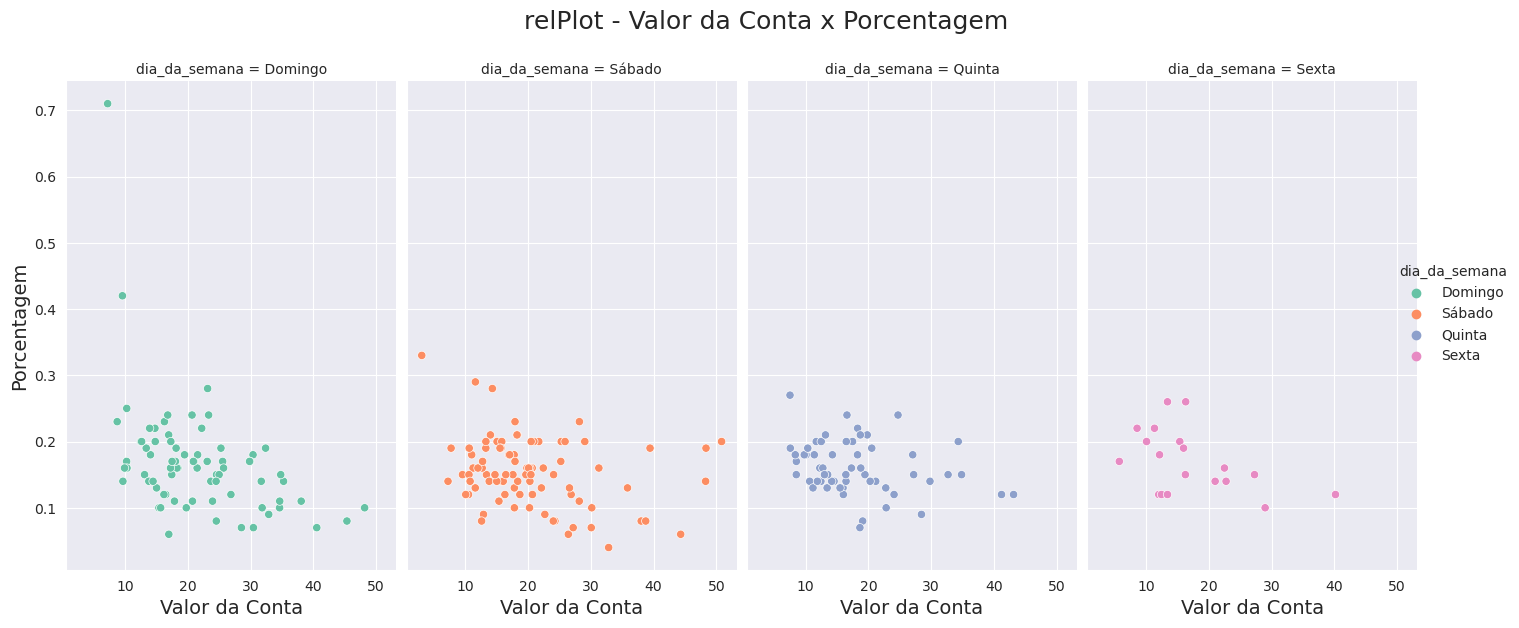

In [54]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

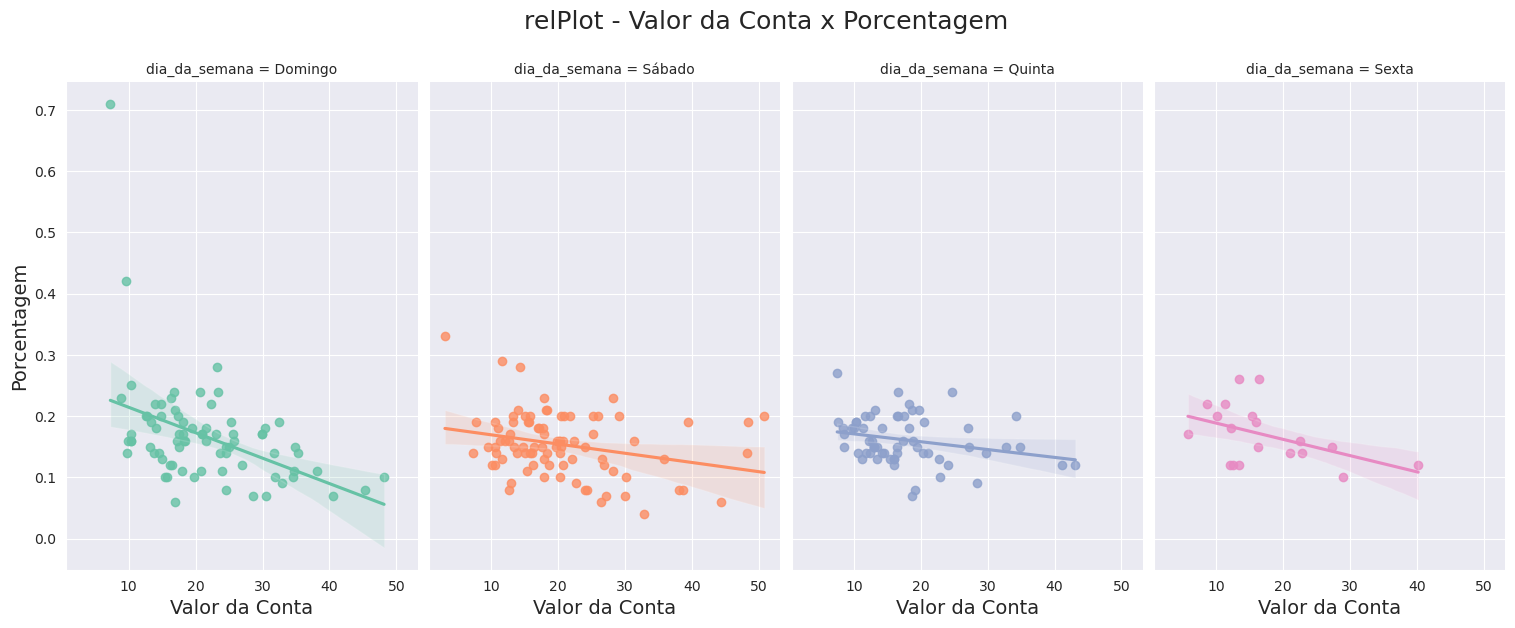

In [55]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('relPlot - Valor da Conta x Porcentagem', fontsize=18, y=1.05)
ax.set_xlabels('Valor da Conta', fontsize=14)
ax.set_ylabels('Porcentagem', fontsize=14)
ax.figure.set_dpi = 300
plt.show()

In [56]:
tip_mean = gorjetas['gorjeta'].mean()

In [57]:
print(f'A média geral das gorjetas é de {tip_mean}')

A média geral das gorjetas é de 2.9982786885245902


In [58]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [59]:
print('Frequência dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [60]:
sunday_bill = gorjetas.query("dia_da_semana == 'Domingo'")['valor_da_conta']

In [61]:
saturday_bill = gorjetas.query("dia_da_semana == 'Sábado'")['valor_da_conta']

In [62]:
_, p_value = ranksums(sunday_bill, saturday_bill)
print(f'O valor do p-value é {p_value}')
print('Aceitaremos h_null!...') if p_value > 0.05 else print('Rejeitaremos h_null e aceitaremos h_alt!...')

O valor do p-value é 0.3576728477868443
Aceitaremos h_null!...


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Hora do dia

In [63]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

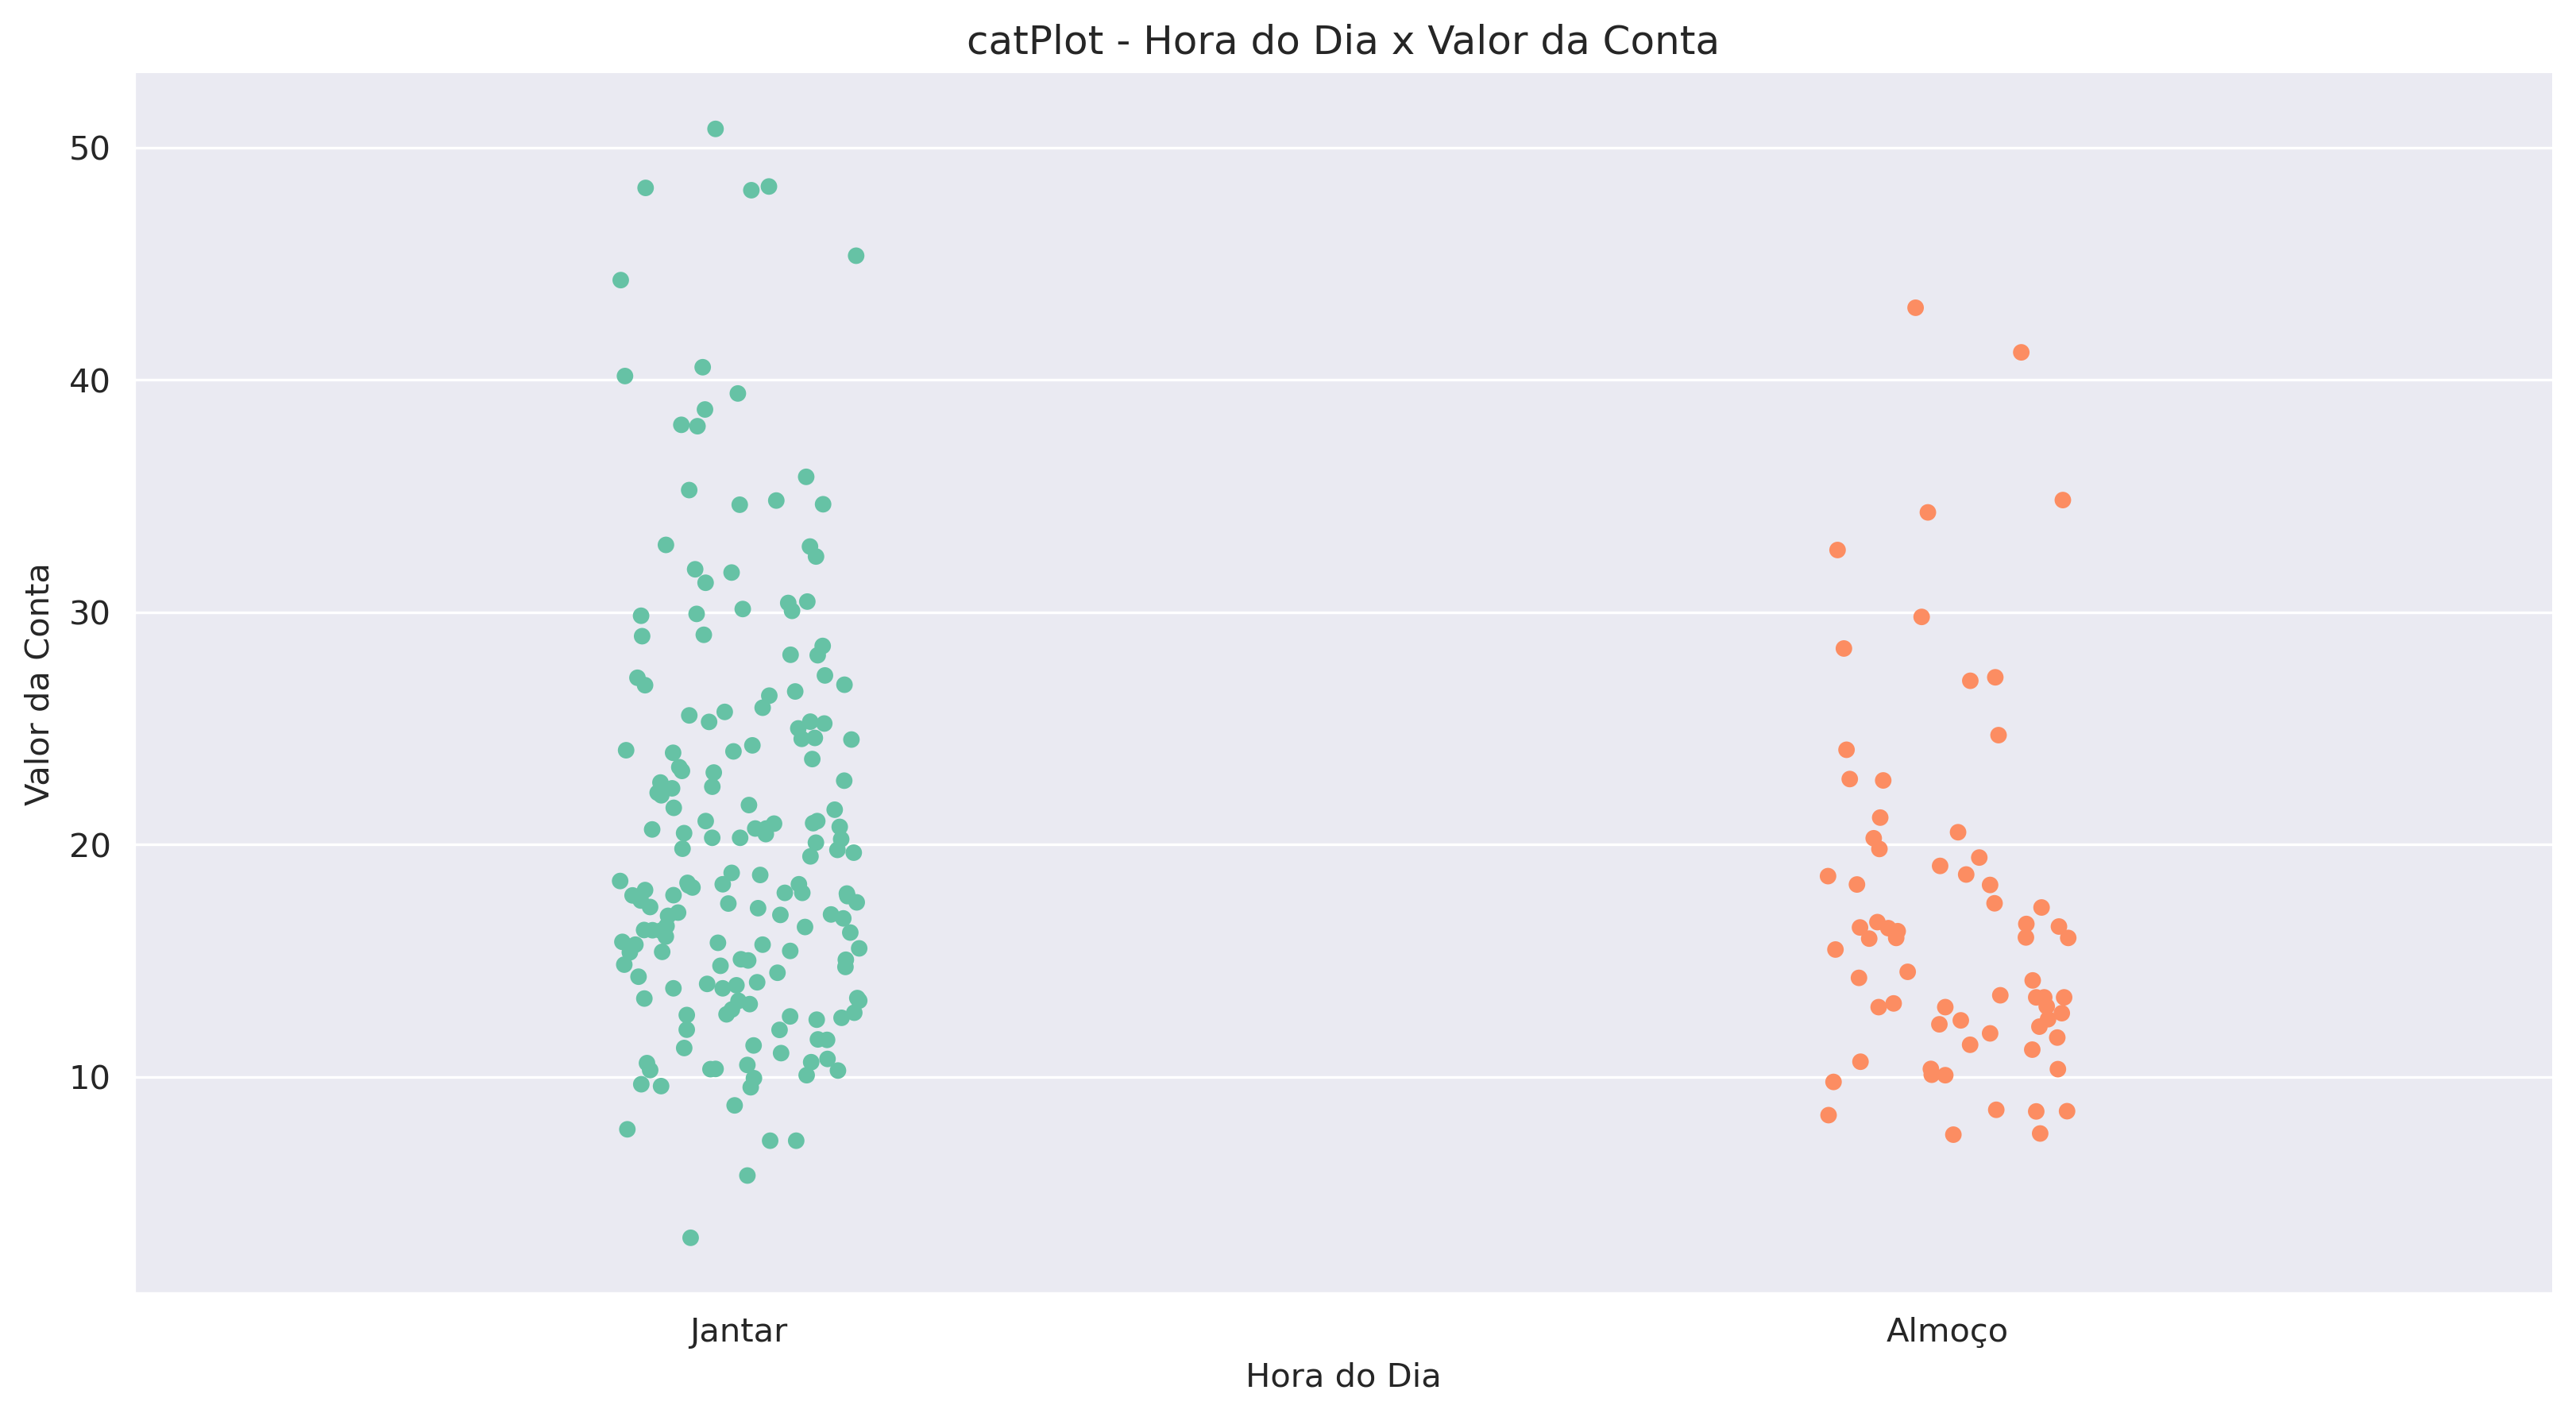

In [64]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)
ax.fig.set_size_inches(12, 6)
ax.set(xlabel='Hora do Dia', ylabel='Valor da Conta', title='catPlot - Hora do Dia x Valor da Conta')
ax.figure.dpi = 300
plt.show()

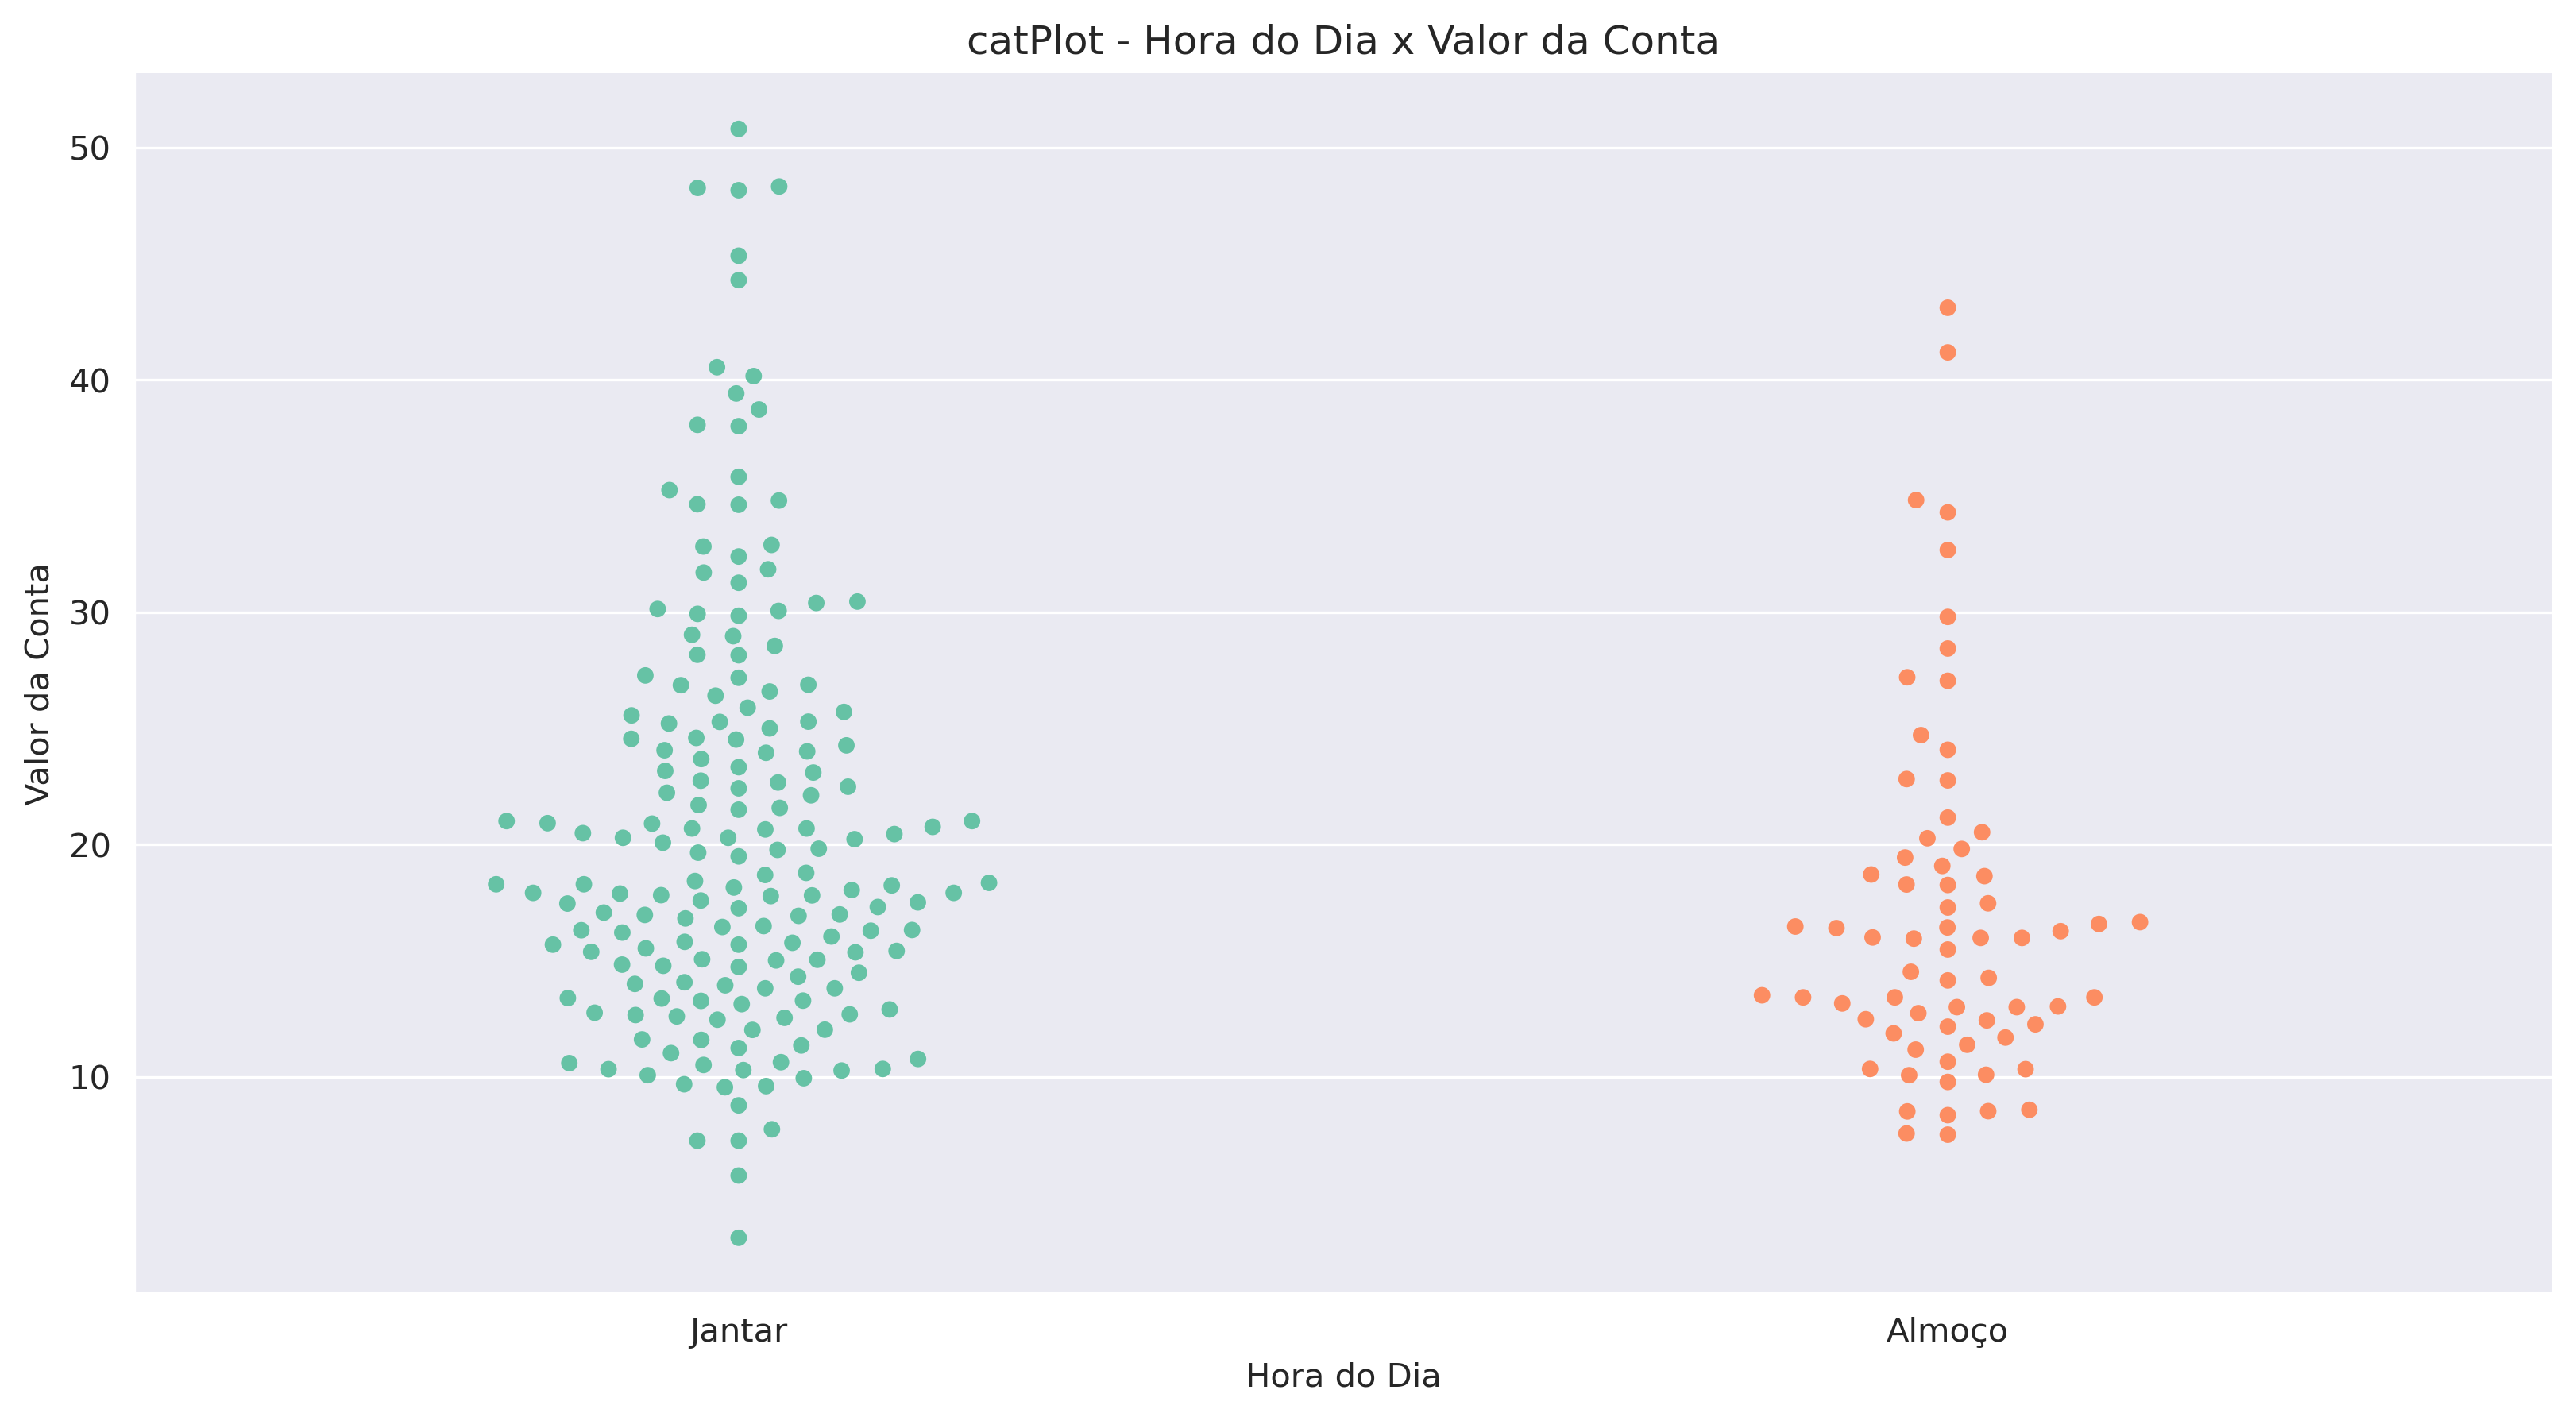

In [65]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, kind='swarm')
ax.fig.set_size_inches(12, 6)
ax.set(xlabel='Hora do Dia', ylabel='Valor da Conta', title='catPlot - Hora do Dia x Valor da Conta')
ax.figure.dpi = 300
plt.show()

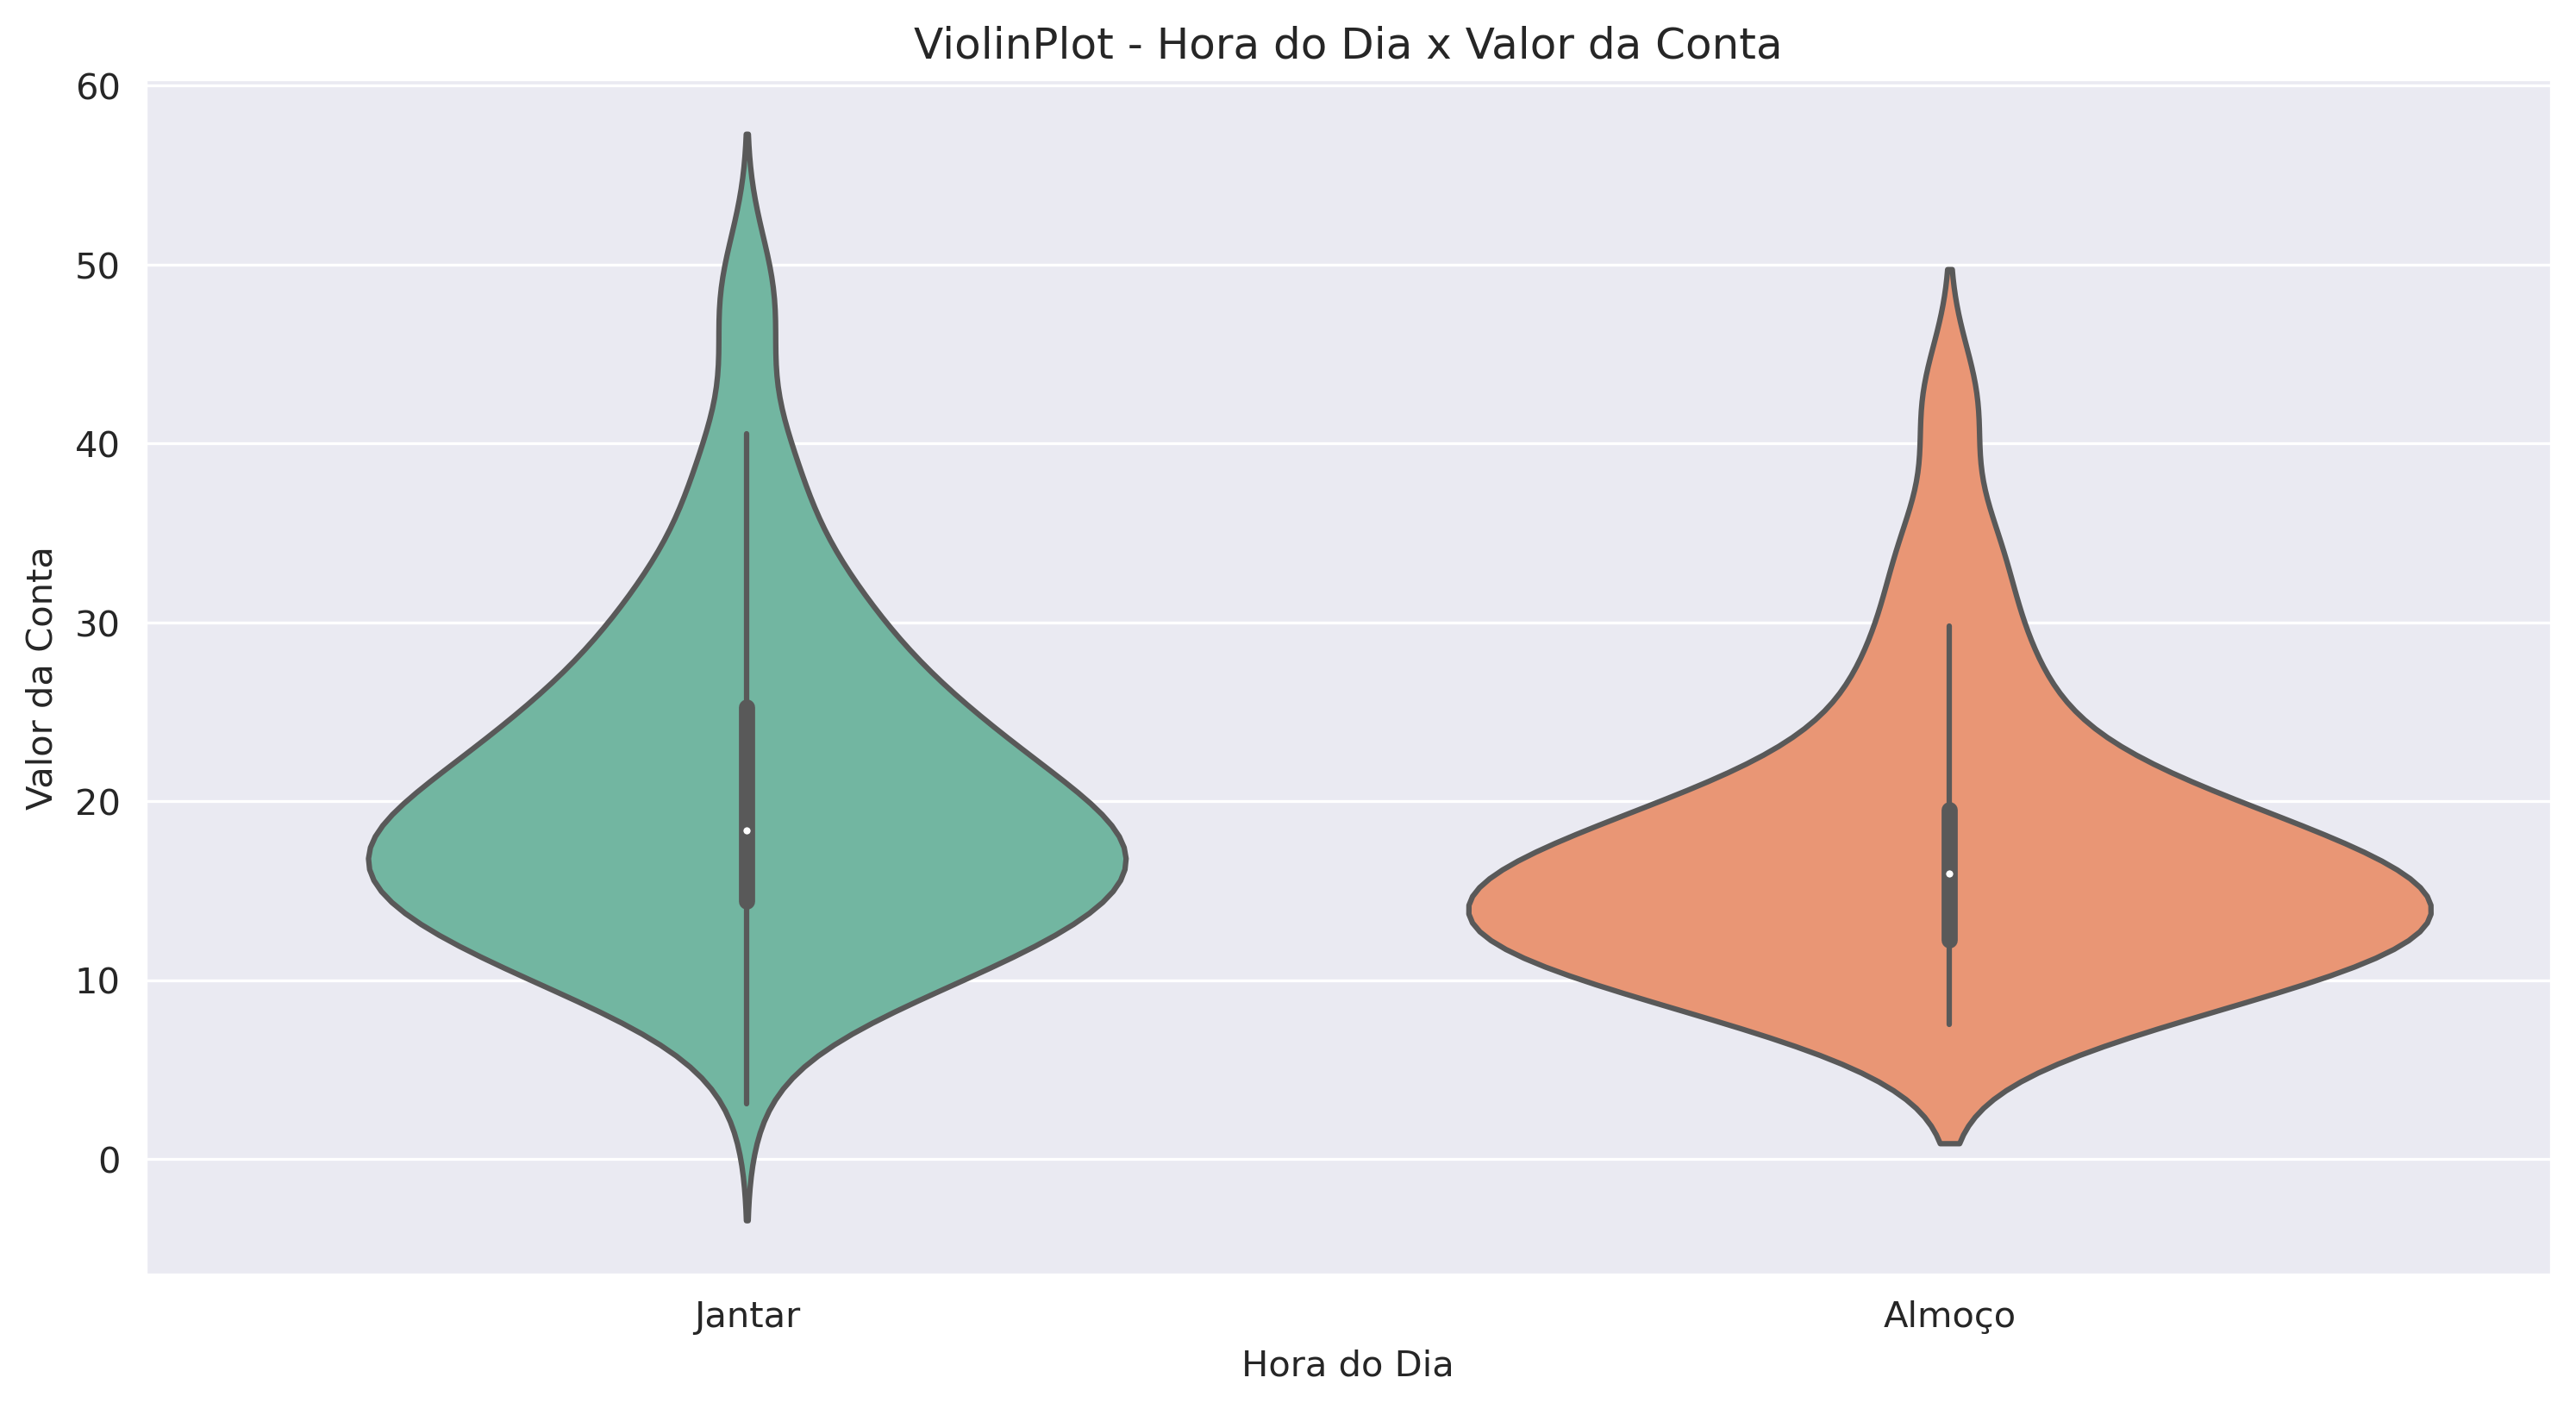

In [66]:
ax = sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)
ax.figure.set_size_inches(12, 6)
ax.set(xlabel='Hora do Dia', ylabel='Valor da Conta', title='ViolinPlot - Hora do Dia x Valor da Conta')
ax.figure.dpi = 300
plt.show()

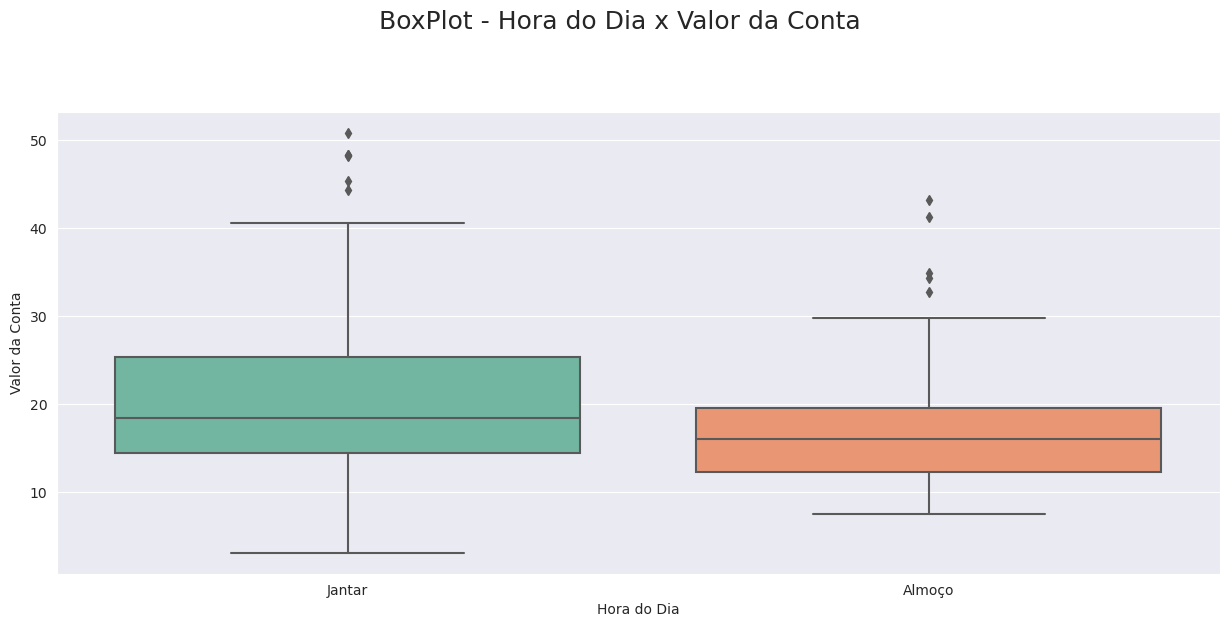

In [67]:
ax = sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)
ax.figure.set_size_inches(15, 6)
ax.figure.suptitle('BoxPlot - Hora do Dia x Valor da Conta', fontsize=18, y=1.05)
ax.set(xlabel='Hora do Dia', ylabel='Valor da Conta')
ax.figure.set_dpi = 300
plt.show()

In [68]:
lunch = gorjetas.query("hora_do_dia == 'Almoço'")['valor_da_conta']

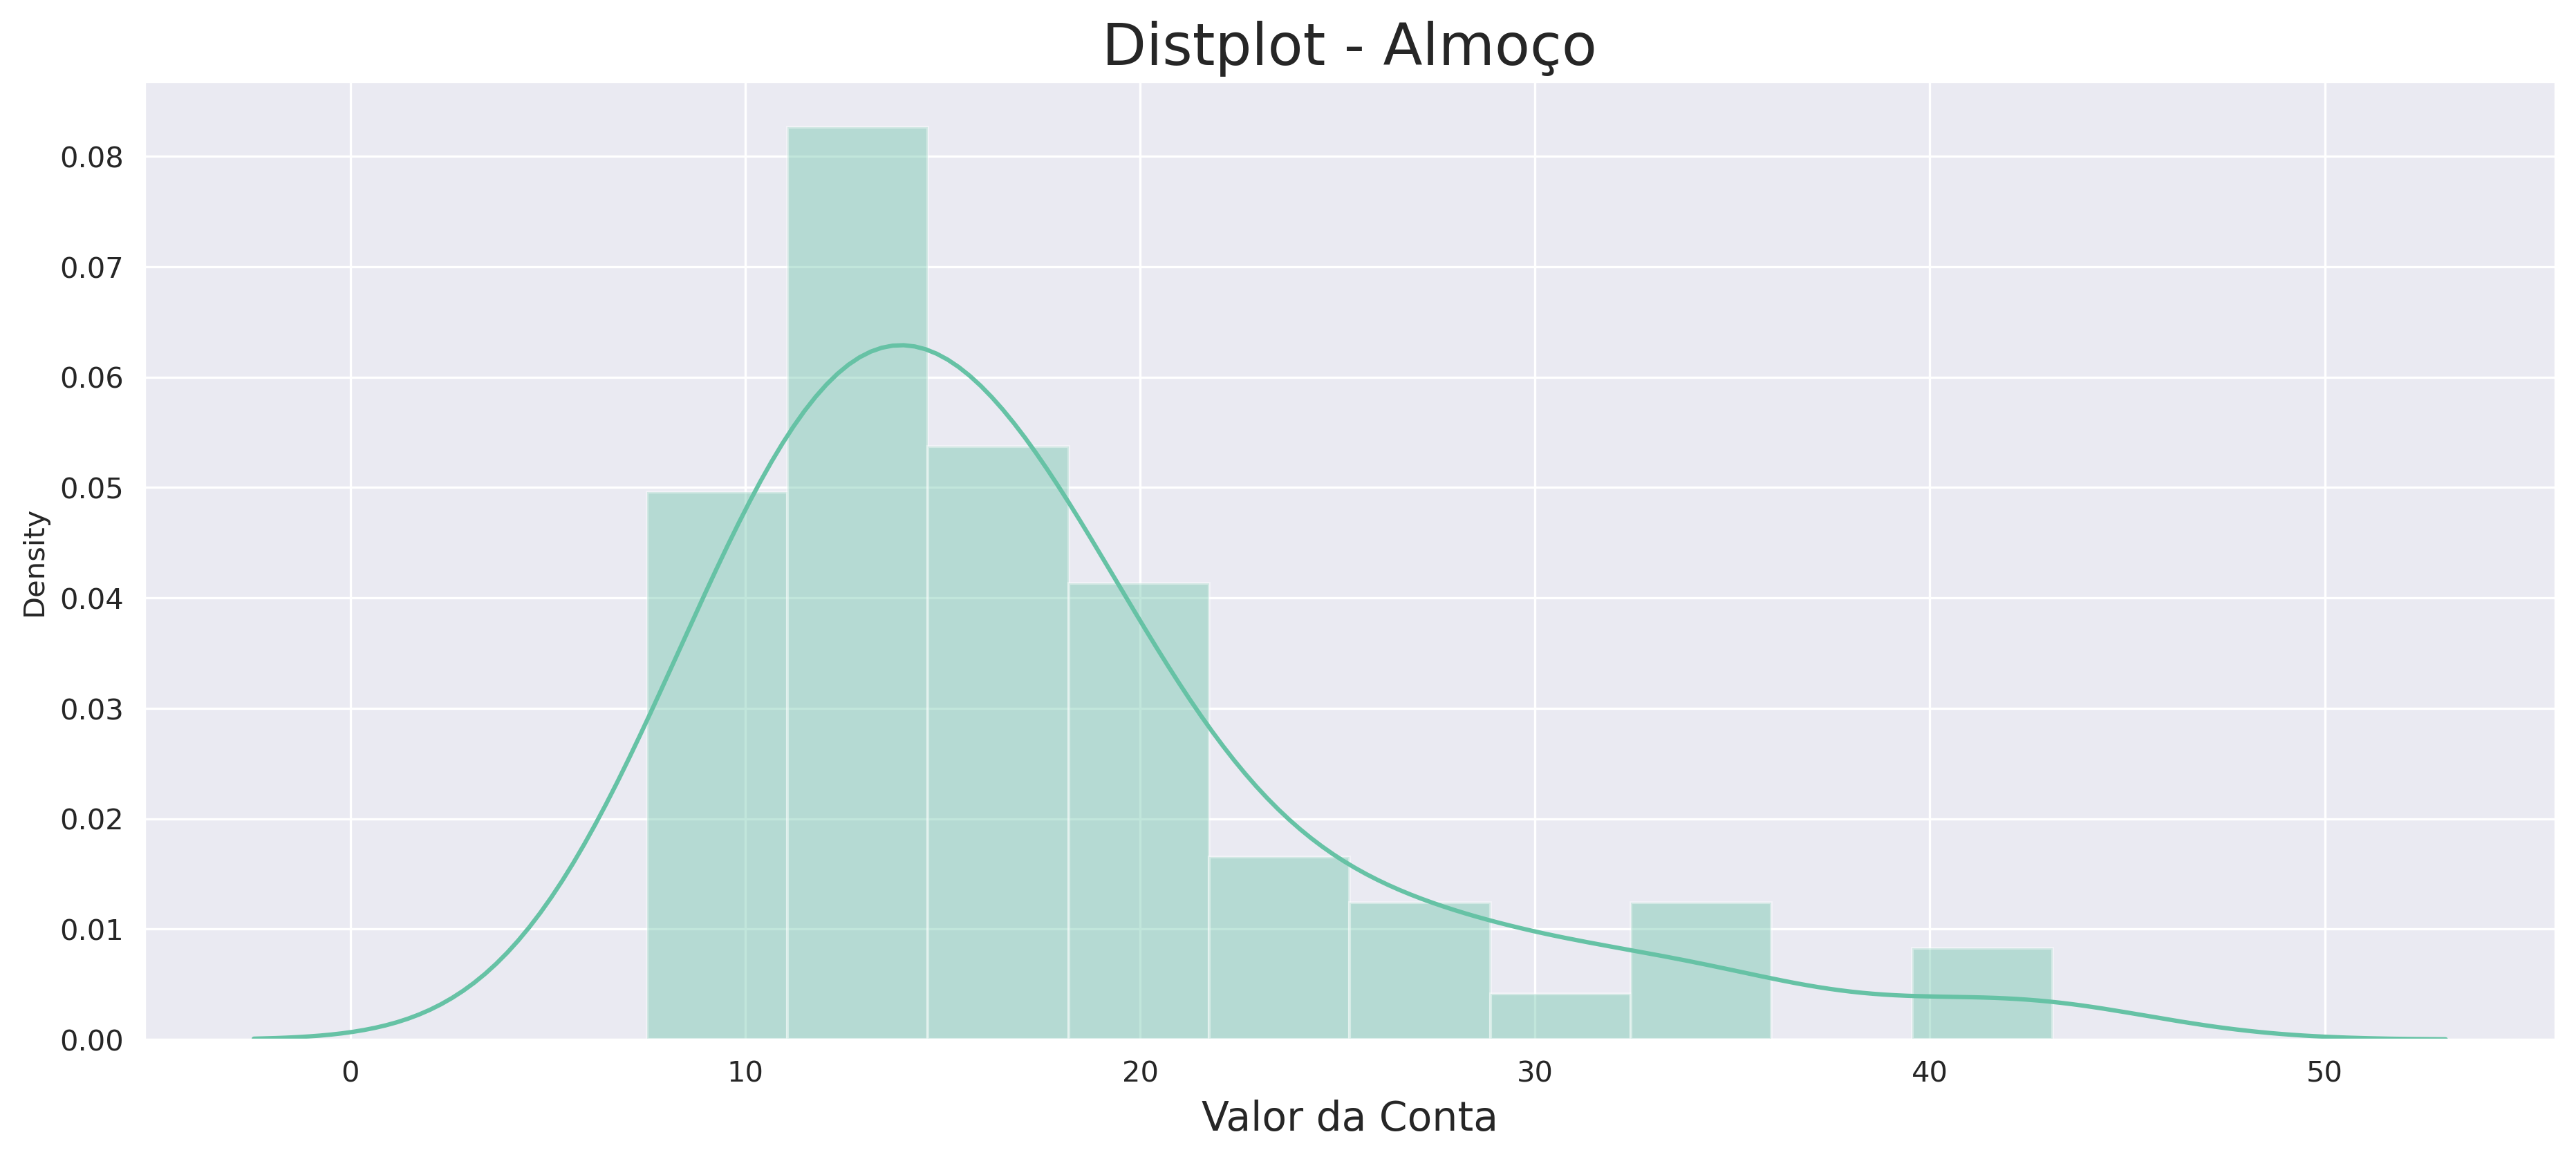

In [69]:
ax = sns.distplot(lunch)
ax.set_xlabel('Valor da Conta', fontsize=14)
ax.figure.set_size_inches(15, 6)
ax.set_title('Distplot - Almoço', fontsize=20)
ax.figure.dpi = 300
plt.show()

In [70]:
dinner = gorjetas.query("hora_do_dia == 'Jantar'")['valor_da_conta']

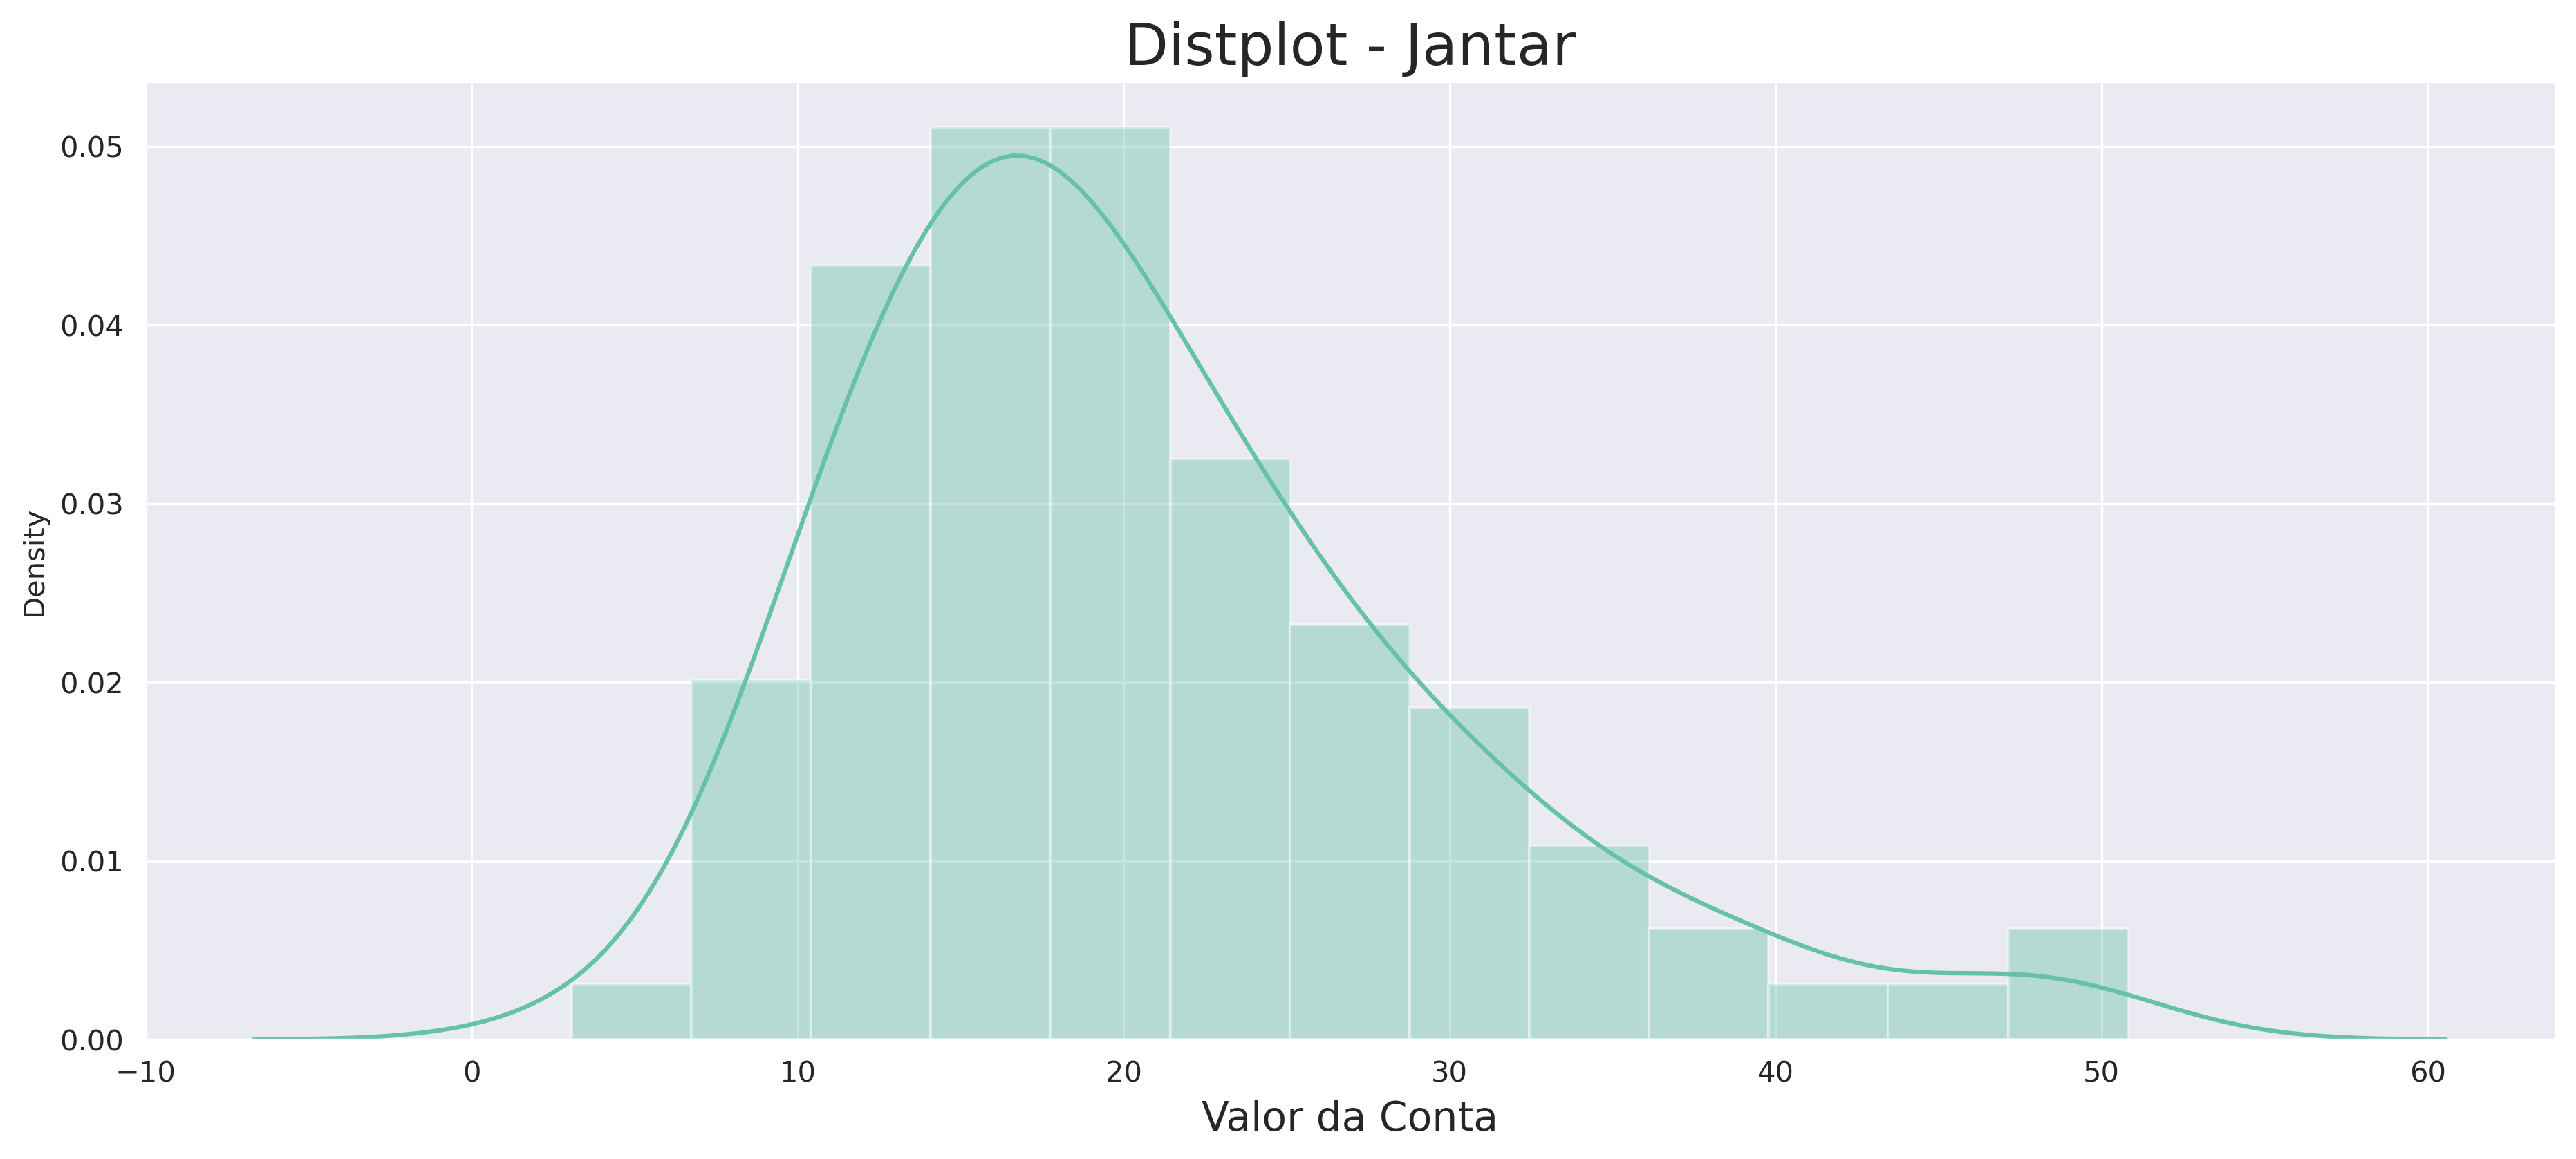

In [71]:
ax = sns.distplot(dinner)
ax.set_xlabel('Valor da Conta', fontsize=14)
ax.figure.set_size_inches(15, 6)
ax.set_title('Distplot - Jantar', fontsize=20)
ax.figure.dpi = 300
plt.show()

In [73]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [75]:
_, p_value = ranksums(dinner, lunch)
print(f'O valor do p-value é {p_value}')
print('Aceitaremos h_null!...') if p_value > 0.05 else print('Rejeitaremos h_null e aceitaremos h_alt!...')

O valor do p-value é 0.0011791039723641672
Rejeitaremos h_null e aceitaremos h_alt!...


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [78]:
lunch_percent = gorjetas.query("hora_do_dia == 'Almoço'")['porcentagem']

In [79]:
dinner_percent = gorjetas.query("hora_do_dia == 'Jantar'")['porcentagem']

In [80]:
_, p_value = ranksums(lunch_percent, dinner_percent)
print(f'O valor do p-value é {p_value}')
print('Aceitaremos h_null!...') if p_value > 0.05 else print('Rejeitaremos h_null e aceitaremos h_alt!...')

O valor do p-value é 0.2602493995587126
Aceitaremos h_null!...


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**